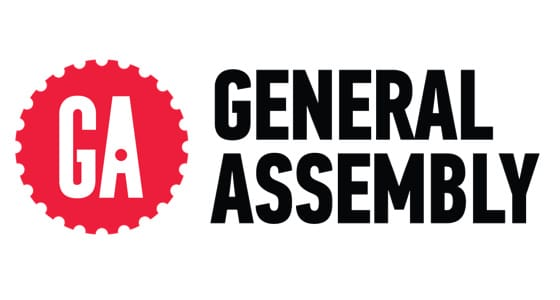
# Project 2 - Ames Housing Data

## Table of Contents: 
1. Problem Statement
2. Data Import and Cleaning
3. EDA & Feature Engineering
4. Modeling Process
    - Linear Regression
    - Ridge Regression
    - Lasso Regression

5. Evaluation of Models

## Problem Statement
We are WEM general insurance based in Ames, Iowa specializing in home insurance.

Customers come to us looking to get their homes insured. A part of getting their homes insured requires the valuation of their property.

We have noticed through feedback forms that customers find our application forms:
Tedious and overly complicated
Usually take more than an hour for customers to fill up (total of 80 questions)
Customers do not want to spend more than 10 mins.

Due to the high dropout rates, management is concerned with the loss of revenue and share of customers to our competitors, who offer quicker and more accurate processing times.

Where data science plays a part?
Through the use of machine learning models (Linear Regression models for this excercise), we are able to effectively simplify the process by performing EDA & Feature Engineering to cut down on unnecessary features to predict the price valuation of homes to be insured. In turn, getting rid of the conventional 80 question application form.

The predictive valuation model will help to:
* Effectively predict the valuation of the property
* Improve efficiencies and the overall customer end-to-end experience
* Increasing take-up rate due to quicker turnaround times through quicker processing times

## Data Import and Cleaning

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, Ridge, Lasso
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, cross_val_score
from statsmodels.stats.outliers_influence import variance_inflation_factor

#to display max rows
pd.options.display.max_rows = 4000
pd.options.display.max_columns = 4000

In [2]:
# Read train.csv
df = pd.read_csv('./datasets/train.csv')
df_test = pd.read_csv('./datasets/test.csv') #for kaggle submission

In [3]:
df.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,1976.0,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,1997.0,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,No,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,TA,Y,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,Gd,5,Typ,0,NaN,Detchd,1953.0,Unf,1.0,246.0,TA,TA,Y,0,52,0,0,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,384.0,384.0,GasA,Gd,Y,SBrkr,744,700,0,1444,0.0,0.0,2,1,3,1,TA,7,Typ,0,NaN,BuiltIn,2007.0,Fin,2.0,400.0,TA,TA,Y,100,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,PConc,Fa,Gd,No,Unf,0.0,Unf,0.0,676.0,676.0,GasA,TA,Y,SBrkr,831,614,0,1445,0.0,0.0,2,0,3,1,TA,6,Typ,0,NaN,Detchd,1957.0,Unf,2.0,484.0,TA,TA,N,0,59,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [4]:
# remove spaces in columns name
df.columns = df.columns.str.replace(' ','_').str.lower()

In [5]:
df.shape

(2051, 81)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               2051 non-null   int64  
 1   pid              2051 non-null   int64  
 2   ms_subclass      2051 non-null   int64  
 3   ms_zoning        2051 non-null   object 
 4   lot_frontage     1721 non-null   float64
 5   lot_area         2051 non-null   int64  
 6   street           2051 non-null   object 
 7   alley            140 non-null    object 
 8   lot_shape        2051 non-null   object 
 9   land_contour     2051 non-null   object 
 10  utilities        2051 non-null   object 
 11  lot_config       2051 non-null   object 
 12  land_slope       2051 non-null   object 
 13  neighborhood     2051 non-null   object 
 14  condition_1      2051 non-null   object 
 15  condition_2      2051 non-null   object 
 16  bldg_type        2051 non-null   object 
 17  house_style   

In [7]:
# checking data for any odd values
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,2051.0,1.474034e+03,8.439808e+02,1.0,753.5,1486.0,2.198000e+03,2930.0
pid,2051.0,7.135900e+08,1.886918e+08,526301100.0,528458140.0,535453200.0,9.071801e+08,924152030.0
ms_subclass,2051.0,5.700878e+01,4.282422e+01,20.0,20.0,50.0,7.000000e+01,190.0
lot_frontage,1721.0,6.905520e+01,2.326065e+01,21.0,58.0,68.0,8.000000e+01,313.0
lot_area,2051.0,1.006521e+04,6.742489e+03,1300.0,7500.0,9430.0,1.151350e+04,159000.0
overall_qual,2051.0,6.112140e+00,1.426271e+00,1.0,5.0,6.0,7.000000e+00,10.0
overall_cond,2051.0,5.562165e+00,1.104497e+00,1.0,5.0,5.0,6.000000e+00,9.0
year_built,2051.0,1.971709e+03,3.017789e+01,1872.0,1953.5,1974.0,2.001000e+03,2010.0
year_remod/add,2051.0,1.984190e+03,2.103625e+01,1950.0,1964.5,1993.0,2.004000e+03,2010.0
mas_vnr_area,2029.0,9.969591e+01,1.749631e+02,0.0,0.0,0.0,1.610000e+02,1600.0


In [8]:
#noted that garage year built max value 2207 lets explore that
df['garage_yr_blt'].value_counts().sort_index().tail()

2007.0    84
2008.0    44
2009.0    17
2010.0     2
2207.0     1
Name: garage_yr_blt, dtype: int64

In [9]:
df[df['garage_yr_blt'] ==2207]

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
1699,2261,916384070,20,RL,68.0,8298,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,1Story,8,5,2006,2007,Hip,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Gd,TA,Av,GLQ,583.0,Unf,0.0,963.0,1546.0,GasA,Ex,Y,SBrkr,1564,0,0,1564,0.0,0.0,2,0,2,1,Ex,6,Typ,1,Gd,Attchd,2207.0,RFn,2.0,502.0,TA,TA,Y,132,0,0,0,0,0,NaN,NaN,NaN,0,9,2007,New,267300


The house was built in 2006 and year remod/Add was in 2007. We are going to assume that the garage was added during the Remodel date (2007)

In [10]:
df.at[1699,'garage_yr_blt']=2007

In [11]:
#verify our house with garage from the future is no longer in our df
df[df['garage_yr_blt'] ==2207]

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice


In [12]:
#lets drop the unique identifiers
df.drop(['id','pid'], axis=1, inplace= True)

In [13]:
df.head()

,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
0,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,1976.0,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,1997.0,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,No,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,TA,Y,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,Gd,5,Typ,0,NaN,Detchd,1953.0,Unf,1.0,246.0,TA,TA,Y,0,52,0,0,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,384.0,384.0,GasA,Gd,Y,SBrkr,744,700,0,1444,0.0,0.0,2,1,3,1,TA,7,Typ,0,NaN,BuiltIn,2007.0,Fin,2.0,400.0,TA,TA,Y,100,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,PConc,Fa,Gd,No,Unf,0.0,Unf,0.0,676.0,676.0,GasA,TA,Y,SBrkr,831,614,0,1445,0.0,0.0,2,0,3,1,TA,6,Typ,0,NaN,Detchd,1957.0,Unf,2.0,484.0,TA,TA,N,0,59,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


# Lets explore null values

In [14]:
df.isnull().sum()[df.isnull().sum()>0].sort_values(ascending=False)

pool_qc           2042
misc_feature      1986
alley             1911
fence             1651
fireplace_qu      1000
lot_frontage       330
garage_yr_blt      114
garage_cond        114
garage_qual        114
garage_finish      114
garage_type        113
bsmt_exposure       58
bsmtfin_type_2      56
bsmt_cond           55
bsmt_qual           55
bsmtfin_type_1      55
mas_vnr_area        22
mas_vnr_type        22
bsmt_half_bath       2
bsmt_full_bath       2
total_bsmt_sf        1
bsmt_unf_sf          1
bsmtfin_sf_2         1
garage_cars          1
garage_area          1
bsmtfin_sf_1         1
dtype: int64

We note from the data documentation that most of the Null values are due to no features rather than actual Null values. 

Example: Basement Quality -> Ranging from Exellent, Good, Typical, Fair, Poor & No Basement (NA). as well as the above

In [15]:
# lets plot a function to view missing data as a % of the feature
def missing_percent(df):
    nan_percent= 100*(df.isnull().sum()/len(df))
    nan_percent= nan_percent[nan_percent>0].sort_values()
    return nan_percent

In [16]:
nan_percent = missing_percent(df).sort_values(ascending = False)

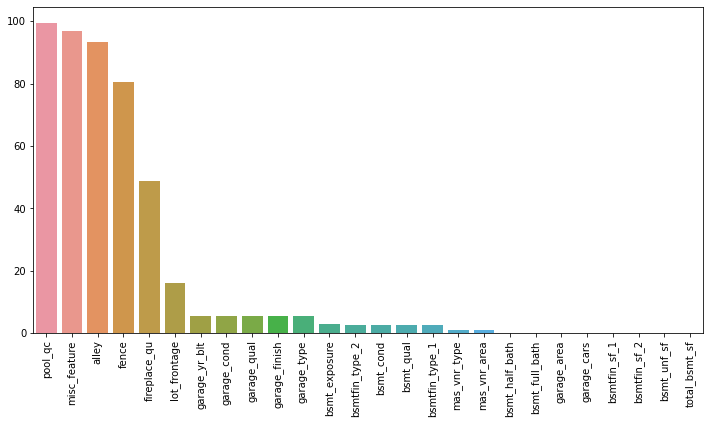

In [17]:
#plotting missing values as a % of Grand Total
plt.figure(figsize=(12,6))
sns.barplot(x=nan_percent.index, y=nan_percent)
plt.xticks(rotation=90);

note that these values are not null but rather, the houses do not have such features. As only the minority of houses have such features, these features will not be part of the scope of focus purely from a supply/ demand standpoint.
* pool_qc - no pool
* misc_feature - no misc features
* alley - no alley access
* fence - no fence

In [18]:
#lets drop pool_qc, misc_features, alley and fence columns as these features have > 90% missing values.
df.drop(['pool_qc','misc_feature','alley','fence'], axis=1, inplace= True)

In [19]:
df.shape

(2051, 75)

In [20]:
#now lets deal with data imbalance features. (features with >90 of dominant value count)
#these features are unlikely to substantially affect our model. As these features are dominantly 90% > skewed, it should also be an indicator of market demand / supply.
def data_imbalance(df):
    data_imbalance = []
    
    for col in df.columns:
        temp_df = df[col].value_counts (normalize = True)
        counts = 0
        for value, perc in temp_df.iteritems():
            if perc > 0.90:
                data_imbalance.append(col)
        
        
    return data_imbalance

In [21]:
list_imbalance = data_imbalance(df)
list_imbalance

['street',
 'utilities',
 'land_slope',
 'condition_2',
 'roof_matl',
 'bsmt_cond',
 'heating',
 'central_air',
 'electrical',
 'low_qual_fin_sf',
 'bsmt_half_bath',
 'kitchen_abvgr',
 'functional',
 'garage_qual',
 'garage_cond',
 'paved_drive',
 '3ssn_porch',
 'screen_porch',
 'pool_area',
 'misc_val']

In [22]:
#briefly looking through the value counts of each
for i in list_imbalance:
    print (df[i].value_counts())

Pave    2044
Grvl       7
Name: street, dtype: int64
AllPub    2049
NoSeWa       1
NoSewr       1
Name: utilities, dtype: int64
Gtl    1953
Mod      88
Sev      10
Name: land_slope, dtype: int64
Norm      2025
Feedr       11
Artery       5
PosA         3
PosN         3
RRNn         2
RRAe         1
RRAn         1
Name: condition_2, dtype: int64
CompShg    2025
Tar&Grv      15
WdShngl       5
WdShake       4
Membran       1
ClyTile       1
Name: roof_matl, dtype: int64
TA    1834
Gd      89
Fa      65
Po       5
Ex       3
Name: bsmt_cond, dtype: int64
GasA    2018
GasW      20
Wall       6
Grav       5
OthW       2
Name: heating, dtype: int64
Y    1910
N     141
Name: central_air, dtype: int64
SBrkr    1868
FuseA     140
FuseF      35
FuseP       7
Mix         1
Name: electrical, dtype: int64
0       2018
80         3
205        2
512        1
362        1
53         1
360        1
384        1
156        1
436        1
259        1
479        1
140        1
397        1
514        1
1

looking at these features, lets drop them as they are >90% skewed / inbalanced and will unlikely impact model performance significantly

In [23]:
df.drop(columns=list_imbalance, axis = 1, inplace = True)

In [24]:
df.shape

(2051, 55)

### Lets deal with the reamining null values

In [25]:
df.isnull().sum()[df.isnull().sum()>0].sort_values(ascending=False)

fireplace_qu      1000
lot_frontage       330
garage_finish      114
garage_yr_blt      114
garage_type        113
bsmt_exposure       58
bsmtfin_type_2      56
bsmt_qual           55
bsmtfin_type_1      55
mas_vnr_area        22
mas_vnr_type        22
bsmt_full_bath       2
garage_cars          1
bsmt_unf_sf          1
total_bsmt_sf        1
bsmtfin_sf_2         1
bsmtfin_sf_1         1
garage_area          1
dtype: int64

taking a closer look at null values, 
* fireplace_qu: NA = no fireplace (to remap)
* lot_frontage - linear feet of street connected to property - we will explore further later
* garage finish: NA = no garage (to remap)
* garage yr blt = year garage was built - we will explore further later
* garage type: NA = no garage (to remap)
* bsmt_exposure: NA = no basement (to remap)
* bsmfin_type_2: NA = no basement (to remap)
* bsmt_qual: NA = no basement (to remap)
* bsmtfin_type_1: NA = no basement (to remap)
* mas_vnr_area = continous - explore
* mas_vnr_type = nominal  - explore

We shall choose to drop these rows rather than to deal with data interpolation (~2 out of 2051 rows) acceptable
* bsmt_full_bath       
* garage_cars          
* bsmt_unf_sf          
* total_bsmt_sf        
* bsmtfin_sf_2        
* bsmtfin_sf_1        
* garage_area          


In [26]:
df.shape

(2051, 55)

In [27]:
df[df['bsmt_full_bath'].isnull()]

,ms_subclass,ms_zoning,lot_frontage,lot_area,lot_shape,land_contour,lot_config,neighborhood,condition_1,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating_qc,1st_flr_sf,2nd_flr_sf,gr_liv_area,bsmt_full_bath,full_bath,half_bath,bedroom_abvgr,kitchen_qual,totrms_abvgrd,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,wood_deck_sf,open_porch_sf,enclosed_porch,mo_sold,yr_sold,sale_type,saleprice
616,20,RL,123.0,47007,IR1,Lvl,Inside,Edwards,Norm,1Fam,1Story,5,7,1959,1996,Gable,Plywood,Plywood,None,0.0,TA,TA,Slab,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,TA,3820,0,3820,NaN,3,1,5,Ex,11,2,Gd,Attchd,1959.0,Unf,2.0,624.0,0,372,0,7,2008,WD,284700
1327,20,RM,99.0,5940,IR1,Lvl,FR3,BrkSide,Feedr,1Fam,1Story,4,7,1946,1950,Gable,MetalSd,CBlock,None,0.0,TA,TA,PConc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TA,896,0,896,NaN,1,0,2,TA,4,0,NaN,Detchd,1946.0,Unf,1.0,280.0,0,0,0,4,2008,ConLD,79000


In [28]:
# lets drop these 2 rows. note that they have multiple other features with Nan values too
df.dropna(subset= ['bsmt_full_bath'],axis=0, how='all', inplace= True)

In [29]:
df.shape

(2049, 55)

In [30]:
df[df['garage_cars'].isnull()]

,ms_subclass,ms_zoning,lot_frontage,lot_area,lot_shape,land_contour,lot_config,neighborhood,condition_1,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating_qc,1st_flr_sf,2nd_flr_sf,gr_liv_area,bsmt_full_bath,full_bath,half_bath,bedroom_abvgr,kitchen_qual,totrms_abvgrd,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,wood_deck_sf,open_porch_sf,enclosed_porch,mo_sold,yr_sold,sale_type,saleprice
1712,70,RM,50.0,9060,Reg,Lvl,Inside,IDOTRR,Norm,1Fam,2Story,5,6,1923,1999,Gable,Wd Sdng,Plywood,None,0.0,TA,TA,BrkTil,Gd,No,ALQ,548.0,Unf,0.0,311.0,859.0,Ex,942,886,1828,0.0,2,0,3,Gd,6,0,NaN,Detchd,NaN,NaN,NaN,NaN,174,0,212,3,2007,WD,150909


In [31]:
#garage cars and garage area are null values. lets drop this row
df.dropna(subset = ['garage_cars'],axis=0, how='all', inplace = True)

In [32]:
df.shape

(2048, 55)

In [33]:
df.isnull().sum()[df.isnull().sum()>0].sort_values(ascending=False)

fireplace_qu      998
lot_frontage      330
garage_type       113
garage_yr_blt     113
garage_finish     113
bsmt_exposure      56
bsmtfin_type_2     54
bsmt_qual          53
bsmtfin_type_1     53
mas_vnr_type       22
mas_vnr_area       22
dtype: int64

In [34]:
#lets look at correlation between "lot" features
df[['lot_frontage', 'lot_config', 'lot_area', 'lot_shape']].corr()

,lot_frontage,lot_area
lot_frontage,1.000000,0.575238
lot_area,0.575238,1.000000


note that lot_shape and lot_config are categorical features. 
looking deeper into the data documentation, lot config seems to be related to lot frontage. In some classifications, FR3 would mean frontages on 3 sides of the property. we shall use the average of the lot frontage for the respective lot configs to fill up the missing data.

In [35]:
df.groupby('lot_config')['lot_frontage'].mean()

lot_config
Corner     83.245552
CulDSac    55.228571
FR2        60.836735
FR3        85.285714
Inside     66.922960
Name: lot_frontage, dtype: float64

In [36]:
#lets replace null values in lot_frontage respective to their lot configs
df['lot_frontage'] = df.groupby('lot_config')['lot_frontage'].transform(lambda value: value.fillna(value.mean()))

In [37]:
df['lot_frontage'].isnull().sum()

0

In [38]:
#likewise for garage yr blt. lets look at all correlation between 'garage' features
df[['garage_yr_blt', 'garage_type', 'garage_finish', 'garage_cars', 'garage_area']].corr()

,garage_yr_blt,garage_cars,garage_area
garage_yr_blt,1.000000,0.590912,0.563795
garage_cars,0.590912,1.000000,0.893161
garage_area,0.563795,0.893161,1.000000


In [39]:
#lets look at 'year' features instead
df[['garage_yr_blt', 'year_built', 'year_remod/add', 'yr_sold']].corr()

,garage_yr_blt,year_built,year_remod/add,yr_sold
garage_yr_blt,1.000000,0.838051,0.683894,-0.002820
year_built,0.838051,1.000000,0.630181,-0.003923
year_remod/add,0.683894,0.630181,1.000000,0.043077
yr_sold,-0.002820,-0.003923,0.043077,1.000000


from the above, note that its likely that the garage_yr_blt was done together with the building of the property. Correlation is realtively high at 83.8%. Lets go ahead and match the garage_yr_blt against year_built for those rows with missing garage_yr_blt. (Note that we will be matching for those properties with garage. For those without garage's, I will be filling them with the minimum value in the dataset.)

In [40]:
df['garage_yr_blt'].fillna(df['year_built'], inplace=True)

In [41]:
df['garage_yr_blt'].describe()

count    2048.000000
mean     1976.660156
std        26.597044
min      1872.000000
25%      1959.000000
50%      1978.000000
75%      2002.000000
max      2010.000000
Name: garage_yr_blt, dtype: float64

From above, lets settle these features together (113 properties with no garage)
* garage finish: NA = no garage (to remap)
* garage yr blt = year garage was built - to be replaced with year built
* garage type: NA = no garage (to remap)

In [42]:
df['garage_finish'].fillna('NA' , inplace=True)
df['garage_type'].fillna('NA', inplace=True)

In [43]:
df['garage_finish'] = df['garage_finish'].map({'NA':0, 'Unf':1, 'RFn':2, 'Fin':3})

In [44]:
df['garage_finish'].value_counts()

1    847
2    579
3    509
0    113
Name: garage_finish, dtype: int64

In [45]:
df.isnull().sum()[df.isnull().sum()>0].sort_values(ascending=False)

fireplace_qu      998
bsmt_exposure      56
bsmtfin_type_2     54
bsmt_qual          53
bsmtfin_type_1     53
mas_vnr_type       22
mas_vnr_area       22
dtype: int64

we only have to deal with basement and the masonary left. Note that all the bsmt features will null values are ordinal. we will map them later on (NA = no basement)

In [46]:
df['bsmt_qual'].fillna('NA' , inplace = True)
df['bsmt_exposure'].fillna('NA', inplace = True)
df['bsmtfin_type_1'].fillna('NA', inplace = True)
df['bsmtfin_type_2'].fillna('NA', inplace = True)

In [47]:
df['bsmt_qual'] = df['bsmt_qual'].map({'NA':0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})
df['bsmt_exposure'] = df['bsmt_exposure'].map({'NA':0, 'No':1, 'Mn':2, 'Av':3, 'Gd':4})
df['bsmtfin_type_1'] = df['bsmtfin_type_1'].map({'NA':0, 'Unf':1, 'LwQ':2, 'Rec':3, 'BLQ':4, 'ALQ':5, 'GLQ':6})
df['bsmtfin_type_2'] = df['bsmtfin_type_2'].map({'NA':0, 'Unf':1, 'LwQ':2, 'Rec':3, 'BLQ':4, 'ALQ':5, 'GLQ':6})

In [48]:
df.isnull().sum()[df.isnull().sum()>0].sort_values(ascending=False)

fireplace_qu    998
mas_vnr_type     22
mas_vnr_area     22
dtype: int64

In [49]:
#lets check correlation between saleprice and masonry to decide if we want to drop it or retain it
df[['mas_vnr_type', 'mas_vnr_area', 'saleprice']].corr()

,mas_vnr_area,saleprice
mas_vnr_area,1.000000,0.512699
saleprice,0.512699,1.000000


In [50]:
#lets fill the 22 null value rows with mode and mean metrics for convinience
df['mas_vnr_type'].fillna('None', inplace=True)

In [51]:
df['mas_vnr_type'].value_counts()

None       1237
BrkFace     630
Stone       168
BrkCmn       13
Name: mas_vnr_type, dtype: int64

In [52]:
df['mas_vnr_area'].fillna(df['mas_vnr_area'].mean(), inplace=True)

In [53]:
df.isnull().sum()[df.isnull().sum()>0].sort_values(ascending=False)

fireplace_qu    998
dtype: int64

In [54]:
df['fireplace_qu'].fillna('NA' , inplace = True)

In [55]:
#lets map fireplace per data dictionary
df['fireplace_qu'] = df['fireplace_qu'].map({'NA':0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})

In [56]:
df.isnull().sum()[df.isnull().sum()>0].sort_values(ascending=False)

Series([], dtype: int64)

In [57]:
df.shape

(2048, 55)

In [58]:
(2051-2048)/2051 * 100

0.14627011214041932

Note that we have dropped around 0.14% of the rows from the dataset. We shall proceed to EDA and feature engineering. Should our model perform poorly, we may consider re-visiting our data cleaning

# EDA & Feature Engineering

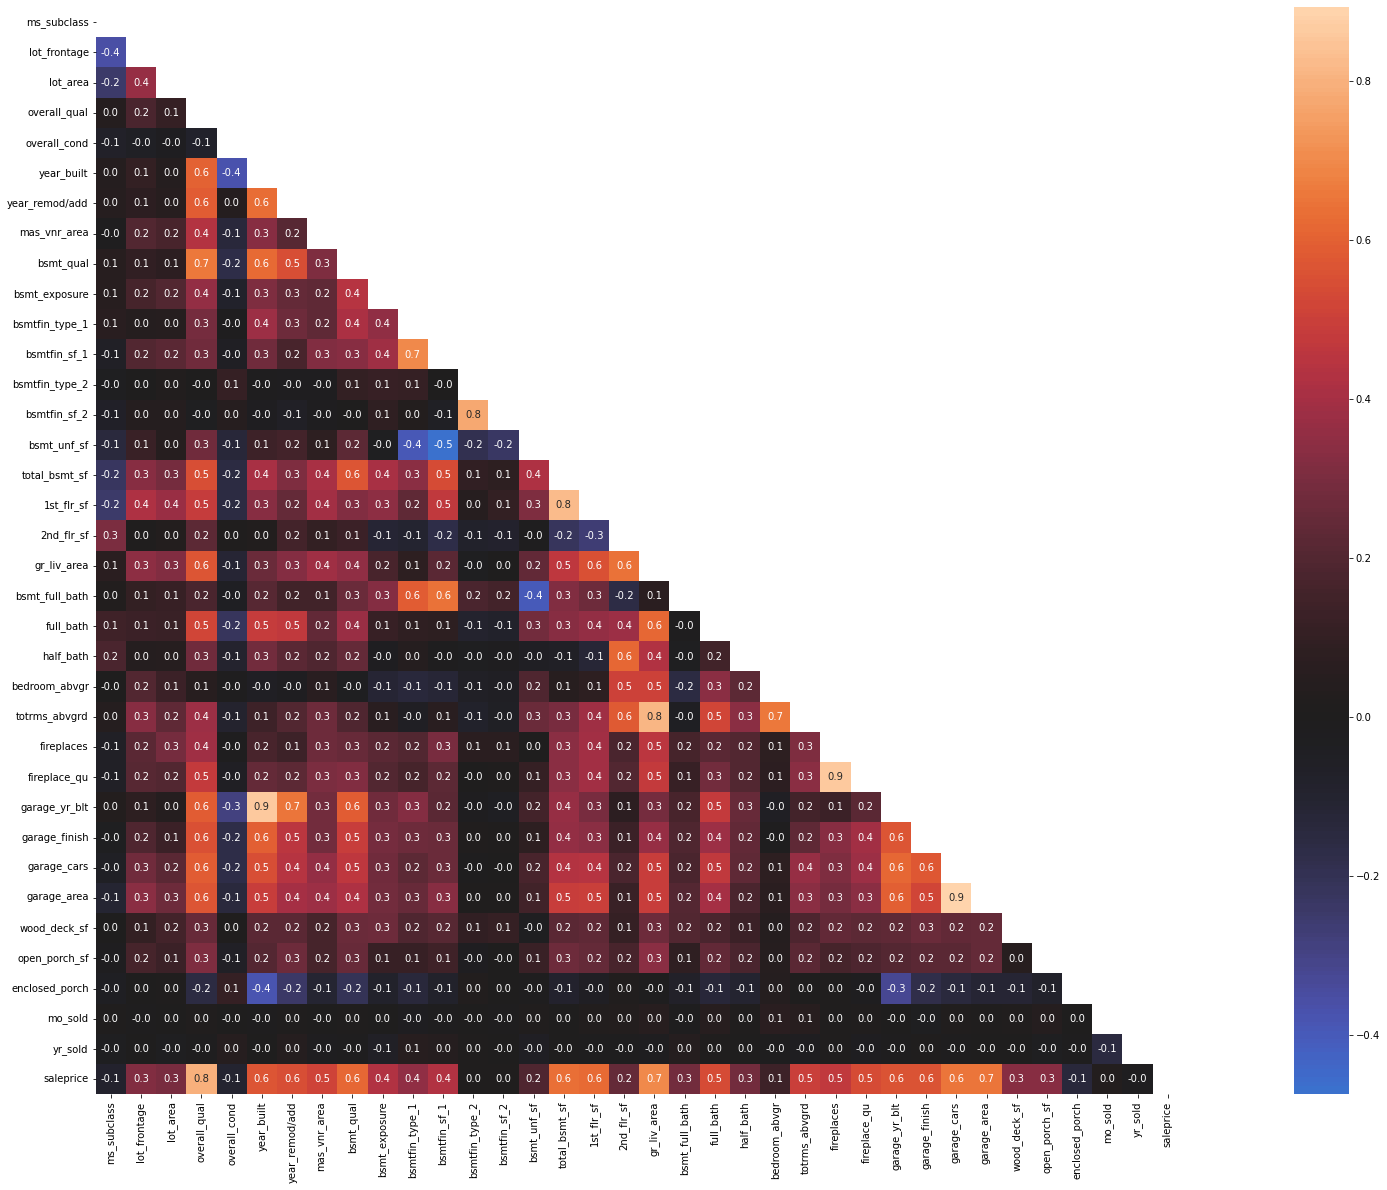

In [59]:
#lets look at corr heatmap
corr = df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(40,20))
sns.heatmap(corr, mask=mask, center=0, annot=True,fmt='.1f',square=True );

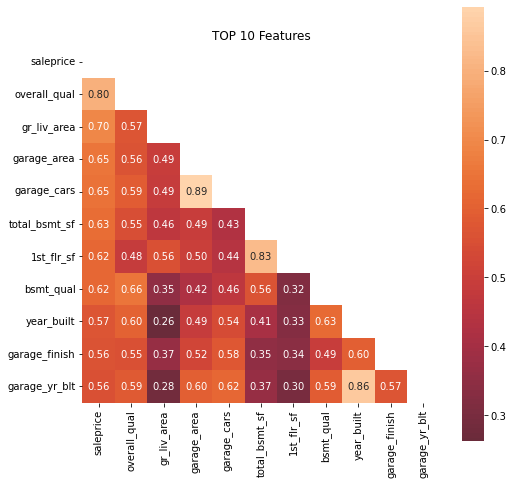

In [60]:
plt.figure(figsize=(8,8))
k = 11
cols = corr.nlargest(k, 'saleprice')['saleprice'].index
corr_10 =  df[cols].corr()
mask = np.zeros_like(corr_10)
mask[np.triu_indices_from(mask)] = True
plt.title('TOP 10 Features')
sns.heatmap(corr_10, mask=mask, center=0, annot=True,fmt='.2f',square=True );

In [61]:
df.corrwith(df['saleprice']).sort_values(ascending = False).head(10)

saleprice        1.000000
overall_qual     0.800975
gr_liv_area      0.698046
garage_area      0.650000
garage_cars      0.648103
total_bsmt_sf    0.631507
1st_flr_sf       0.621181
bsmt_qual        0.617419
year_built       0.572256
garage_finish    0.558638
dtype: float64

we can see that overall_quality yields the highest correlation with the house saleprice. Looking further into the data, we note that there are multiple overlapping features such as garage_area and garage_cars. Let's perform some feature engineering later

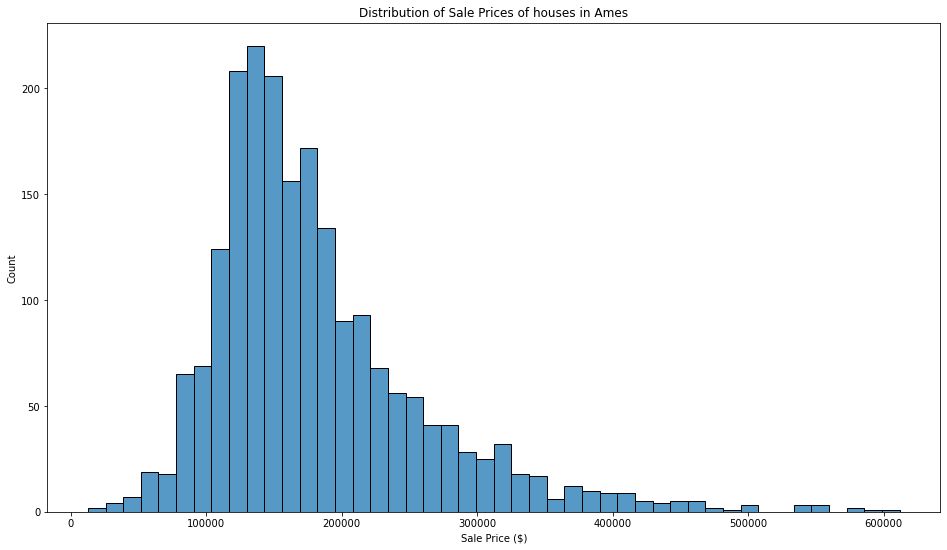

In [62]:
plt.figure(figsize=(16,9))
sns.histplot(data=df,x='saleprice')

plt.xlabel('Sale Price ($)')
plt.title('Distribution of Sale Prices of houses in Ames');

From the histogram of sale prices, we note that the distribution of sale price is right skewed. There were a few houses that had a much higher sale price than the rest. We should be seeing some outliers in our following EDA

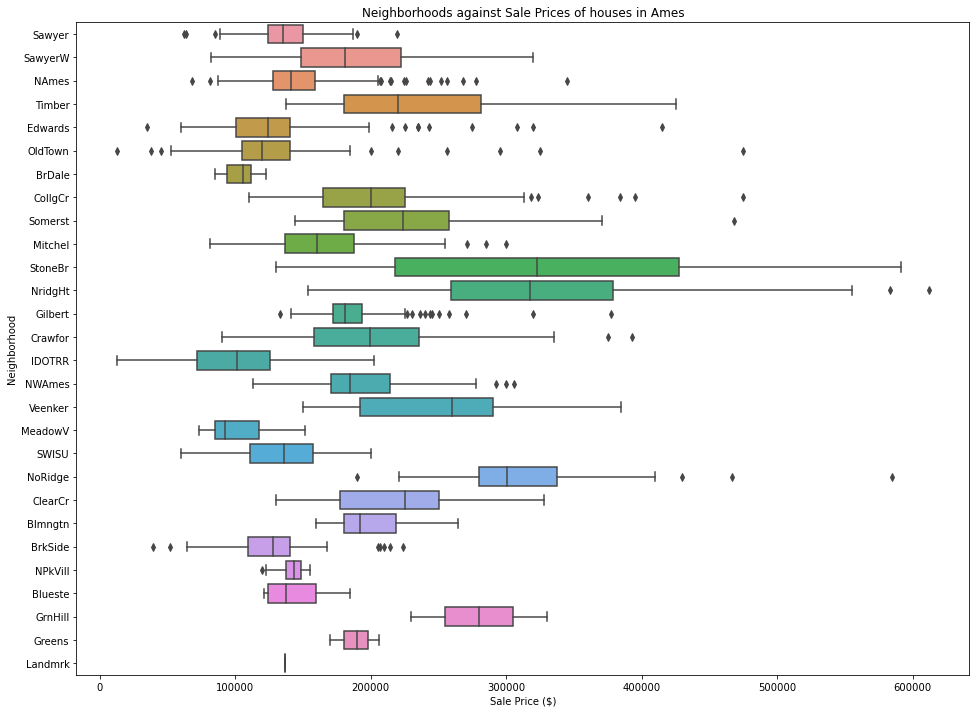

In [63]:
#lets explore prices by neighbourhoods
plt.figure(figsize=(16,12))
sns.boxplot(data=df, x='saleprice', y='neighborhood', orient='h')


plt.xlabel('Sale Price ($)')
plt.ylabel('Neighborhood')
plt.title('Neighborhoods against Sale Prices of houses in Ames');

From the boxplots, the sale prices of houses sorted by neighborhoods are mostly less than $400,000 with the exception of higher sale prices noted in neighborhoods such as Stone Brook, Northridge Heights and Northridge. There are some outliers noted in the other neighborhoods (which may kinda be expected - exceptional houses)

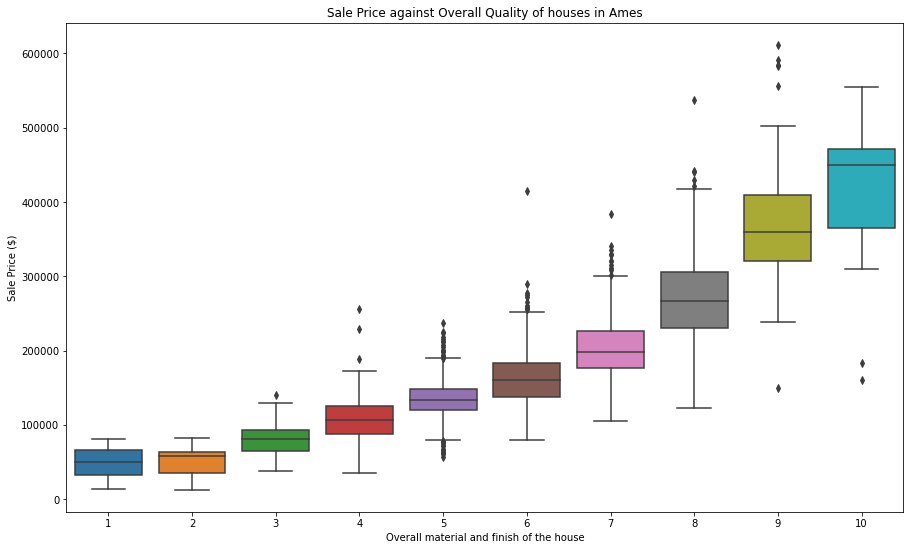

In [64]:
#lets explore prices by overall_qual
plt.figure(figsize=(15,9))
sns.boxplot(data=df, x='overall_qual', y='saleprice', orient='v')


plt.ylabel('Sale Price ($)')
plt.xlabel('Overall material and finish of the house')
plt.title('Sale Price against Overall Quality of houses in Ames');

As expected, sales prices of houses generally increase as the overall material and finish of the houses improves (also the highest correlation factor)

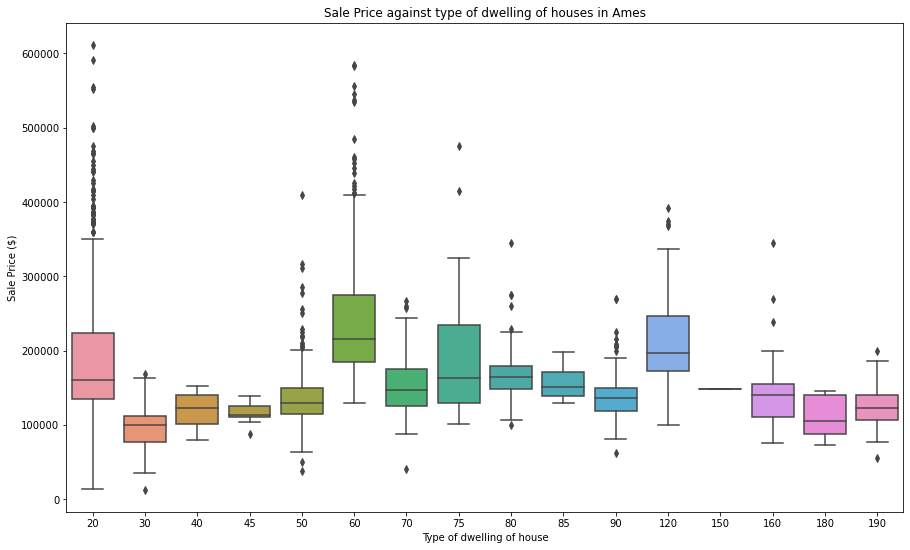

In [65]:
#lets explore prices by their subclass (by judgement, this feature should affect prices significantly but is noted to have a low correlation above)
plt.figure(figsize=(15,9))
sns.boxplot(data=df, x='ms_subclass', y='saleprice', orient='v')


plt.ylabel('Sale Price ($)')
plt.xlabel('Type of dwelling of house')
plt.title('Sale Price against type of dwelling of houses in Ames');

In [66]:
df.dtypes['ms_subclass']

dtype('int64')

the data is more categorical than tier'd. I note that the data type is int64.(which does not equate that '190' is scaled at a higher sale price than '20' subclass) We shall convert this into a categorical demoninator later through get.dummies

In [67]:
#convert ms_subclass to object
df['ms_subclass']= df['ms_subclass'].astype(str)

In [68]:
df.dtypes['ms_subclass']

dtype('O')

In [69]:
df.shape

(2048, 55)

/var/folders/r_/49pl15x93h7_fgw1j0x9phxc0000gn/T/ipykernel_87402/1068832742.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  f, ax = plt.subplots(figsize=(9, 6))


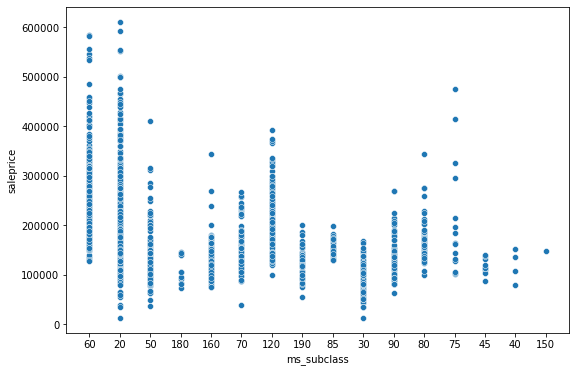

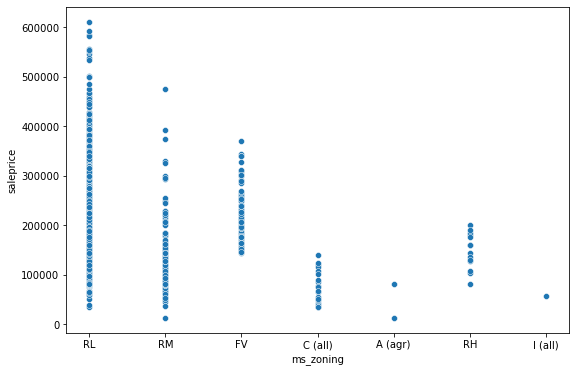

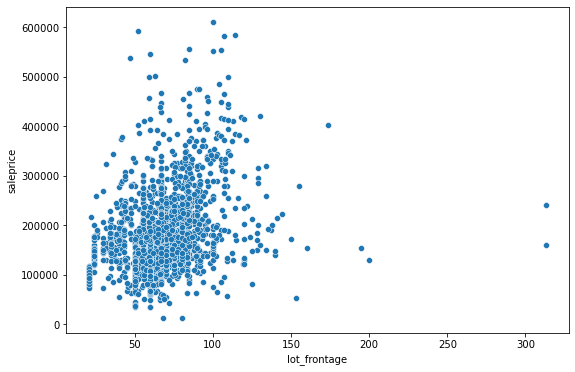

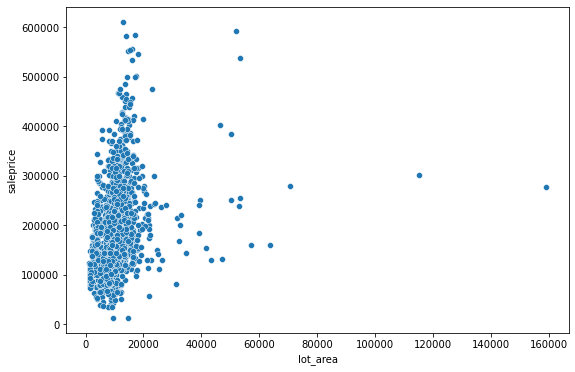

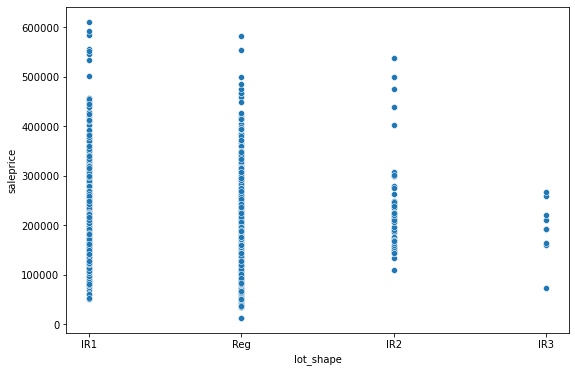

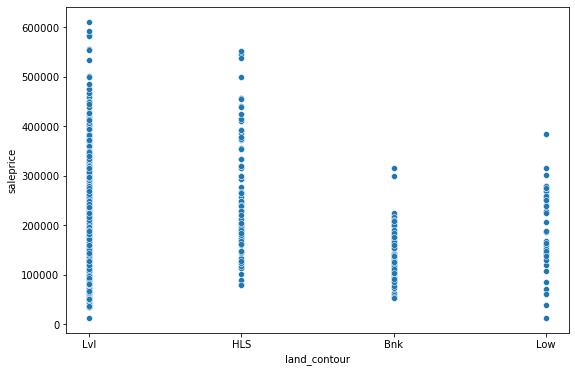

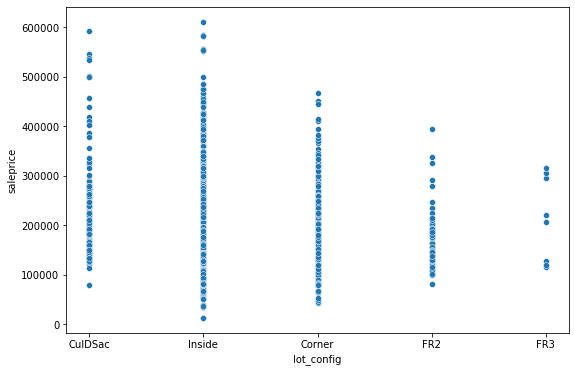

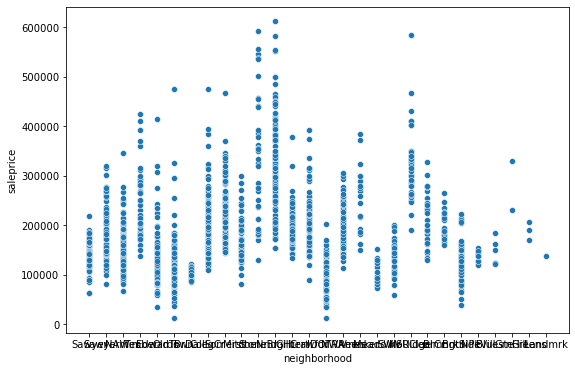

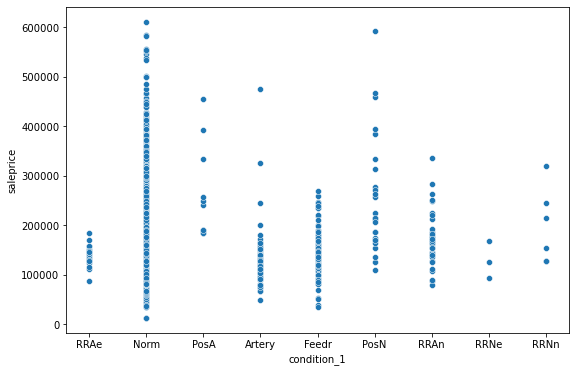

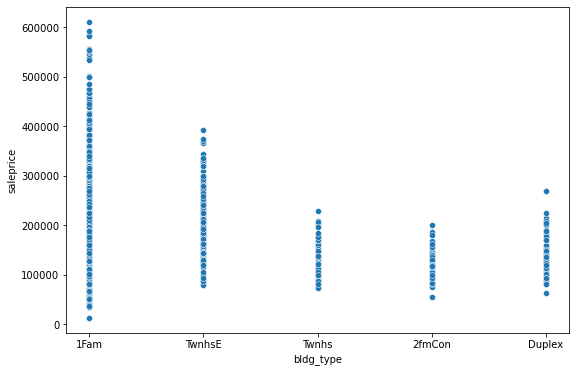

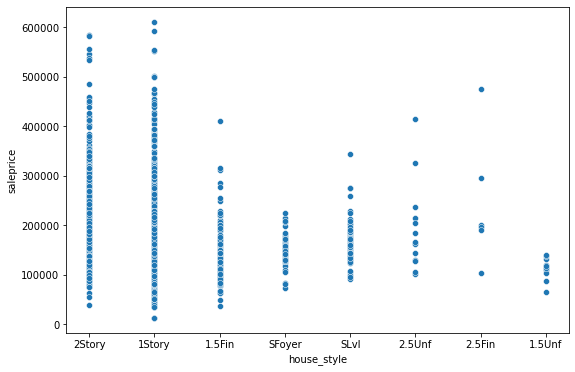

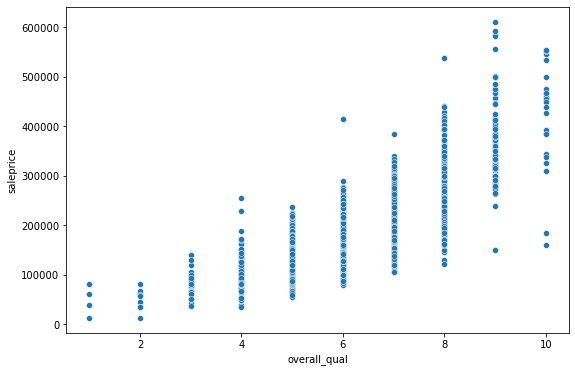

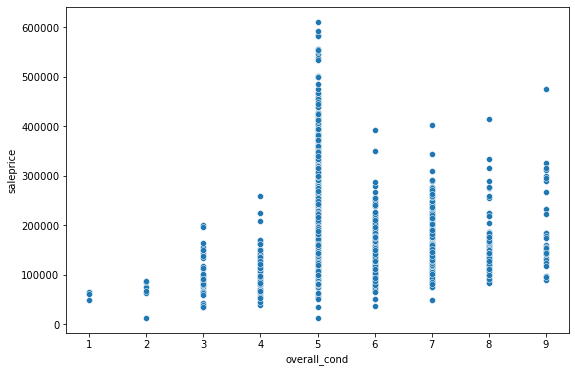

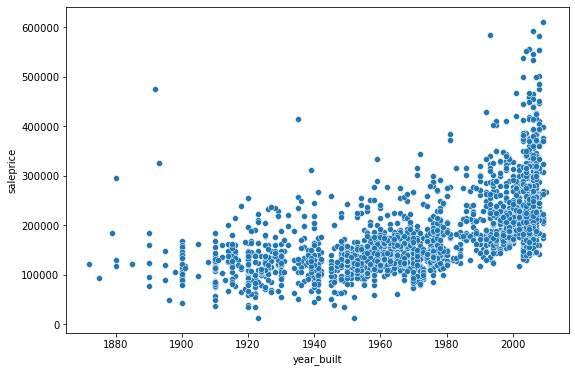

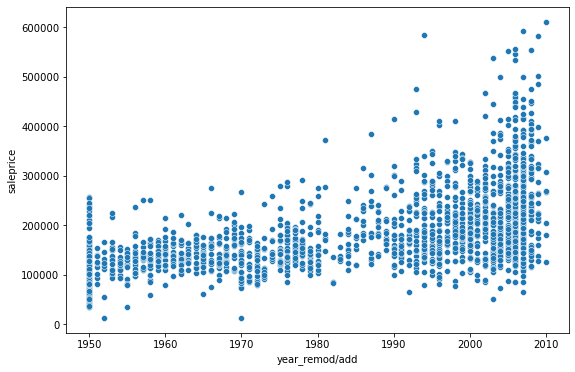

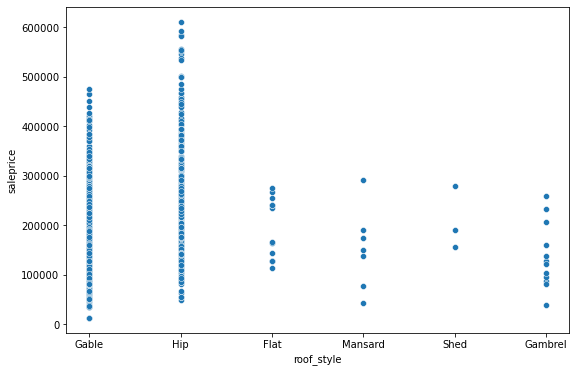

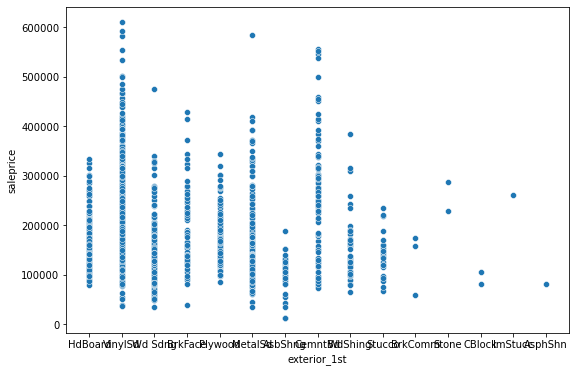

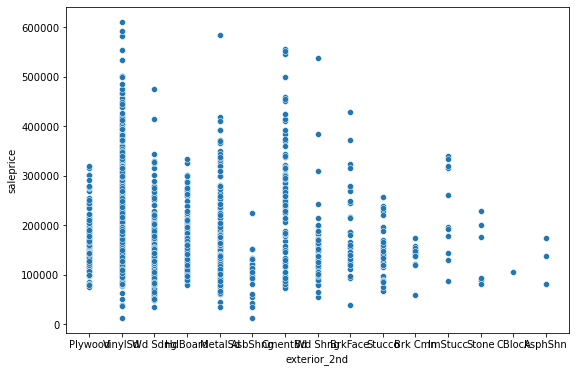

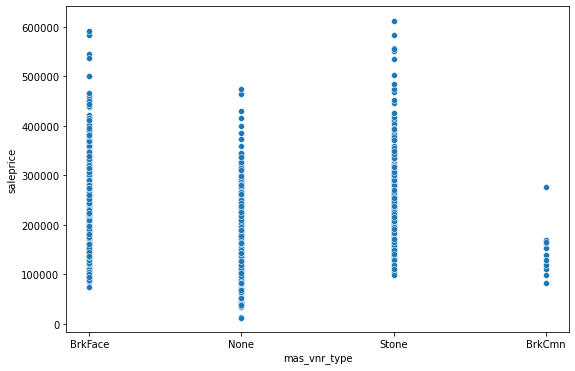

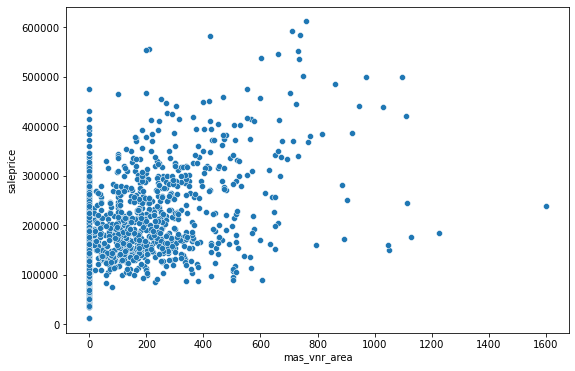

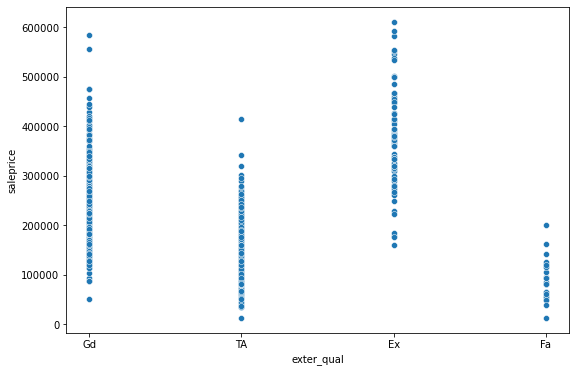

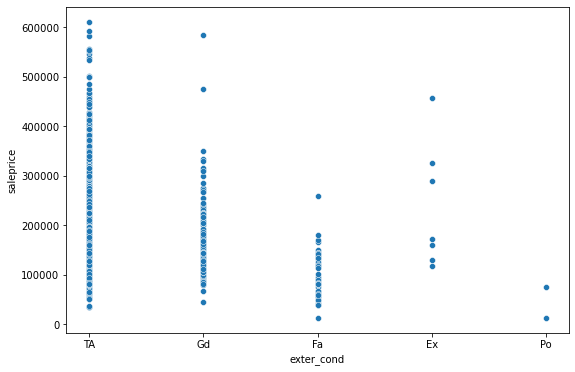

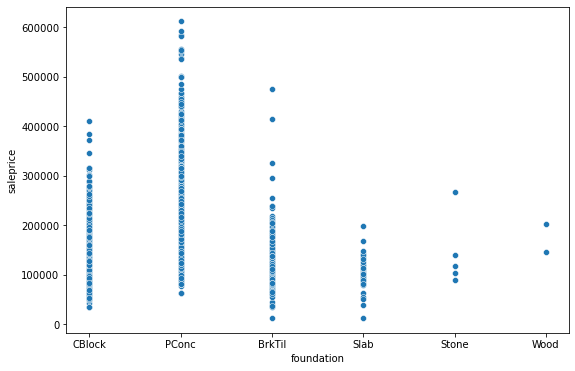

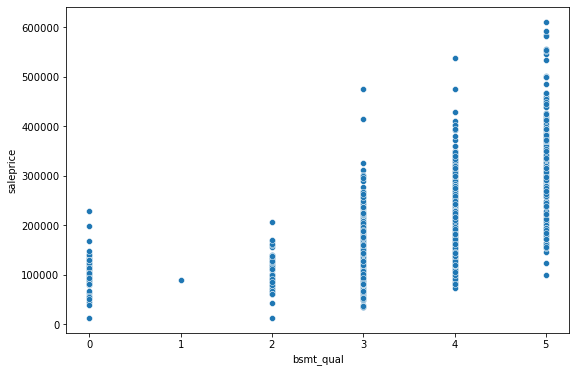

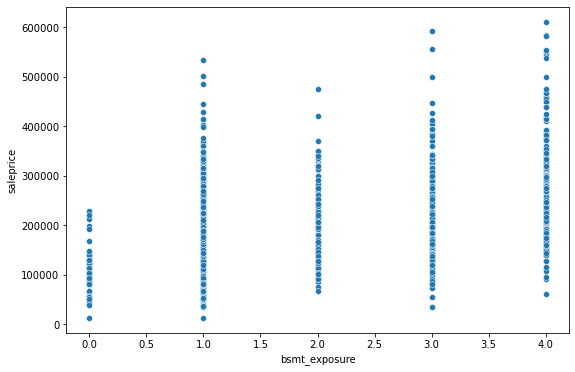

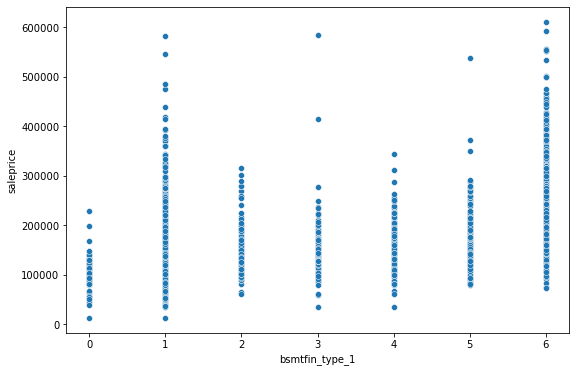

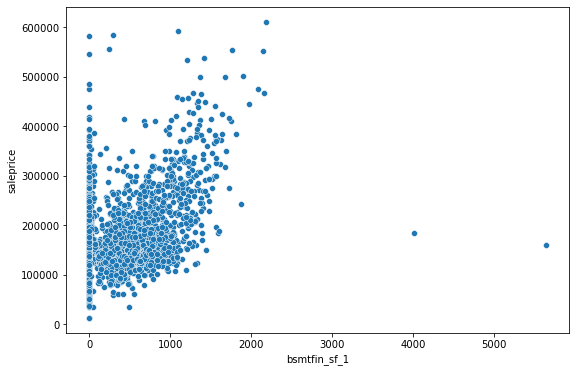

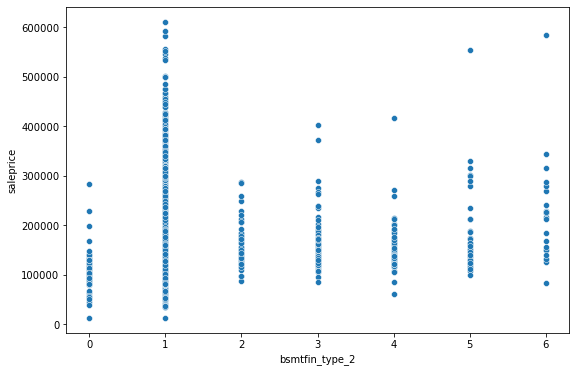

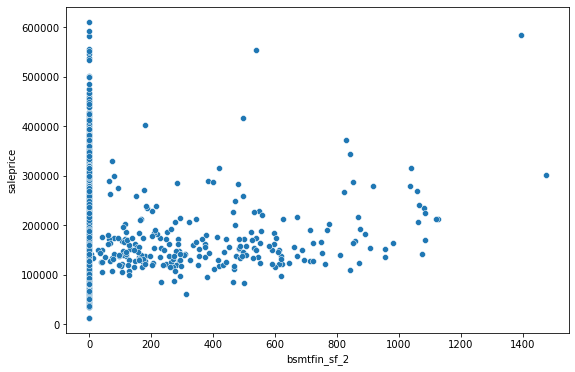

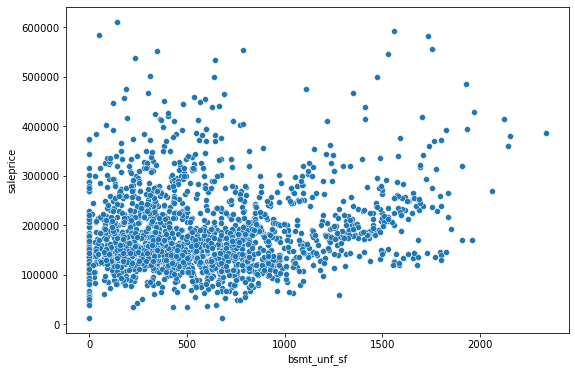

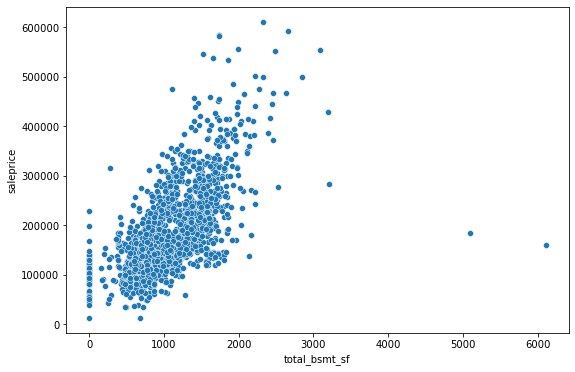

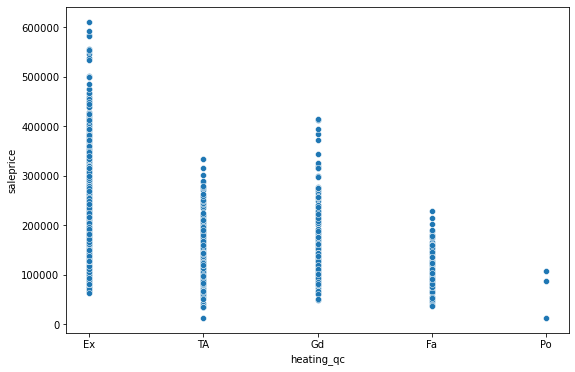

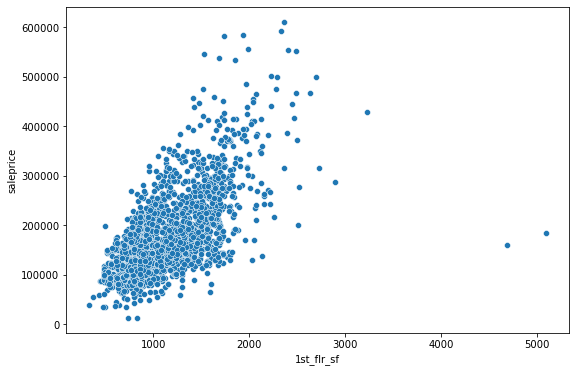

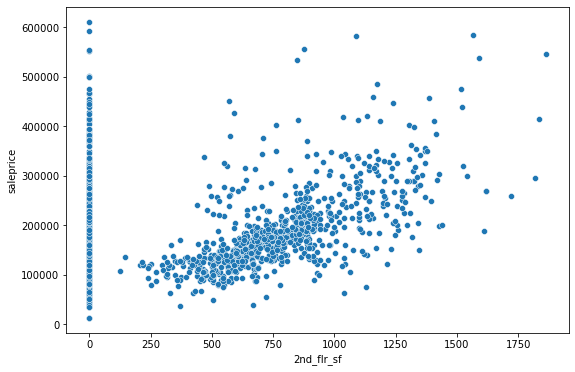

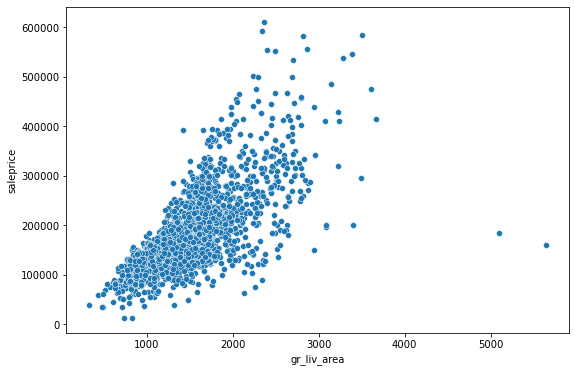

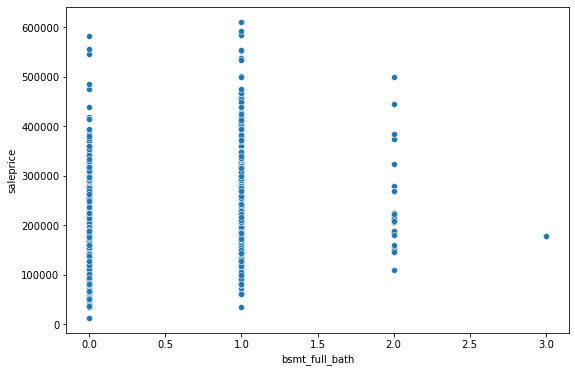

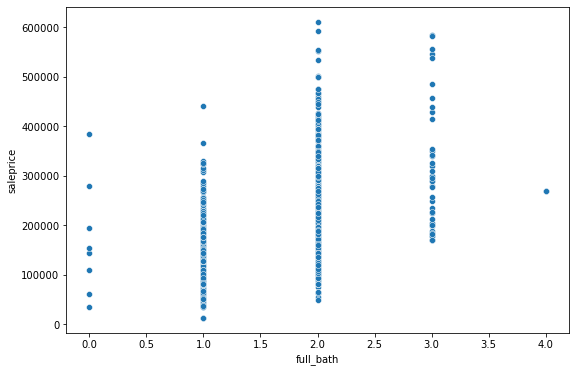

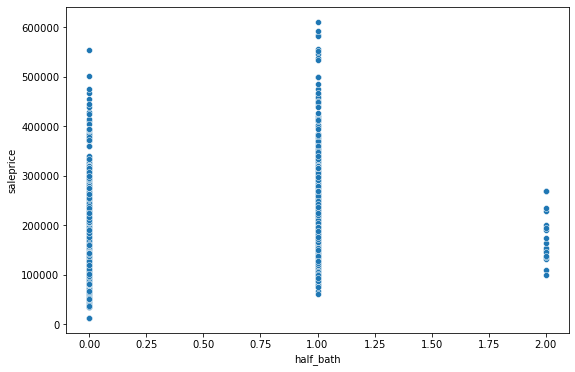

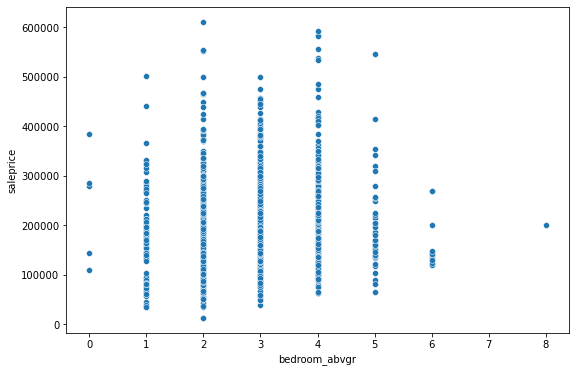

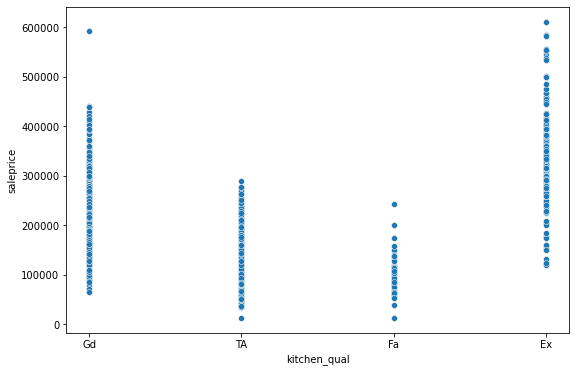

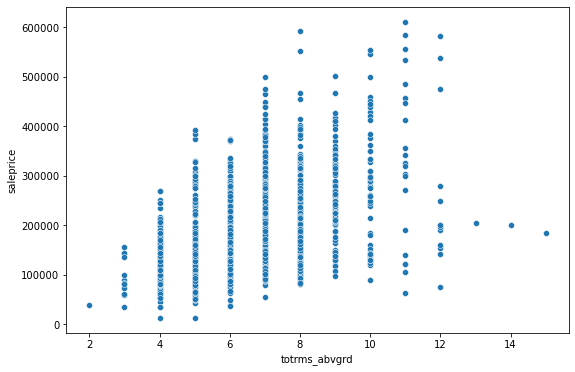

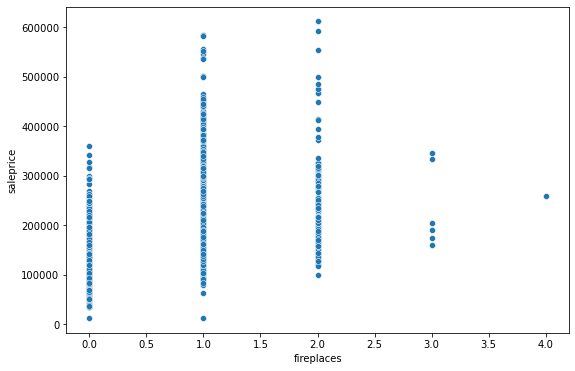

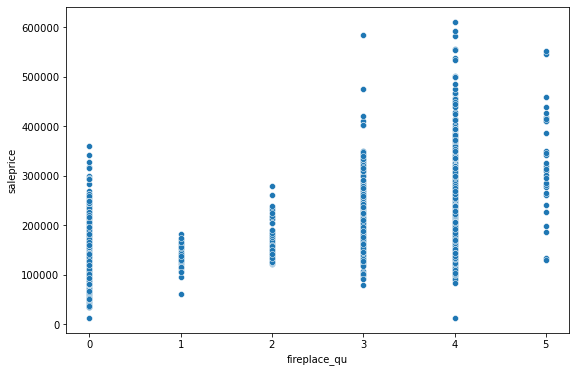

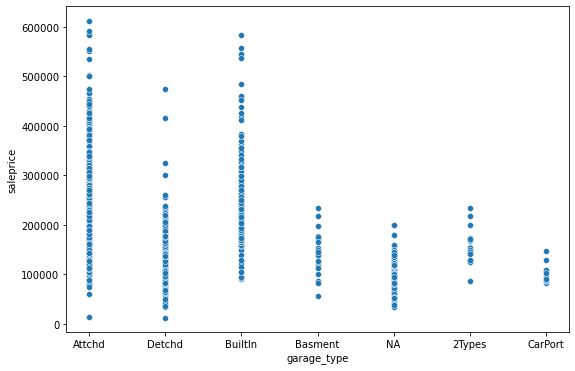

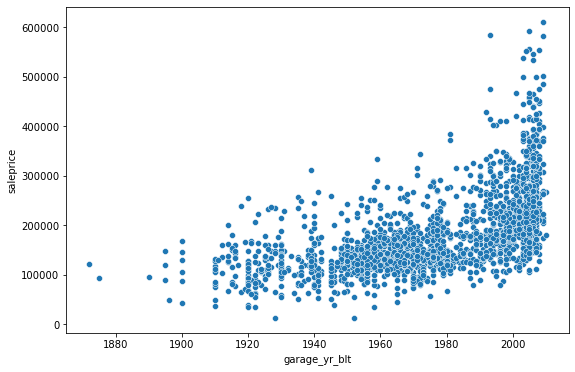

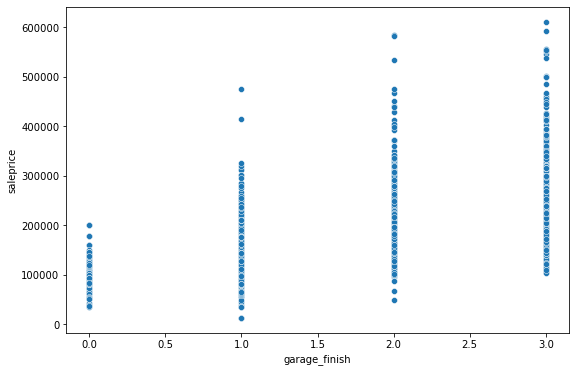

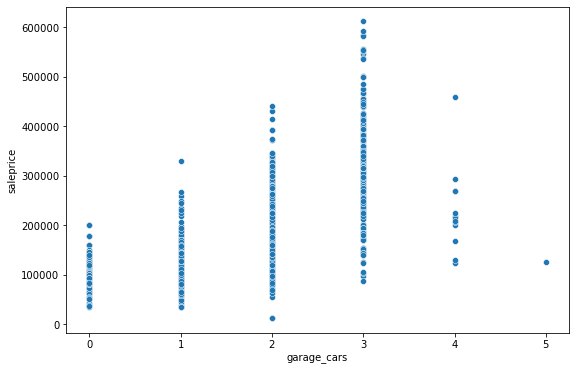

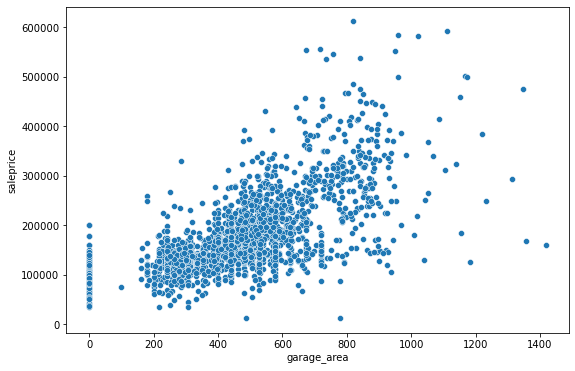

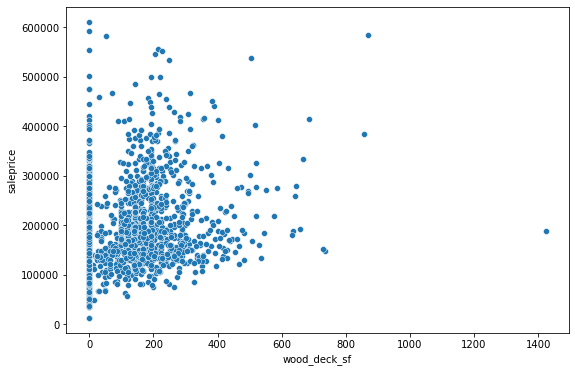

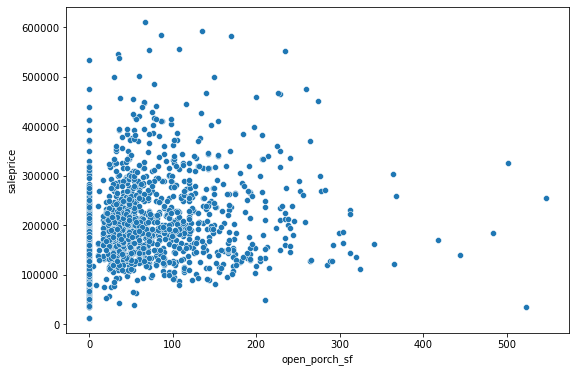

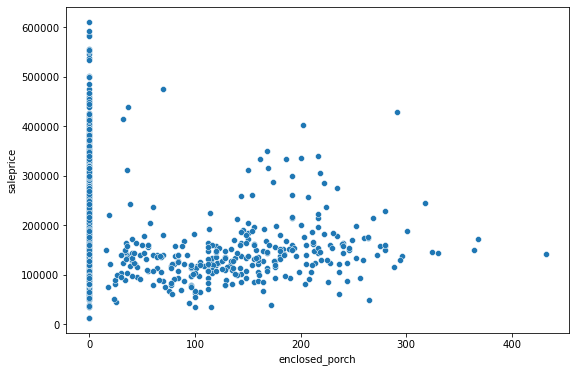

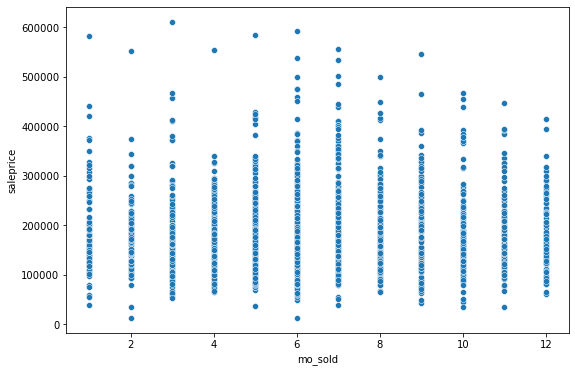

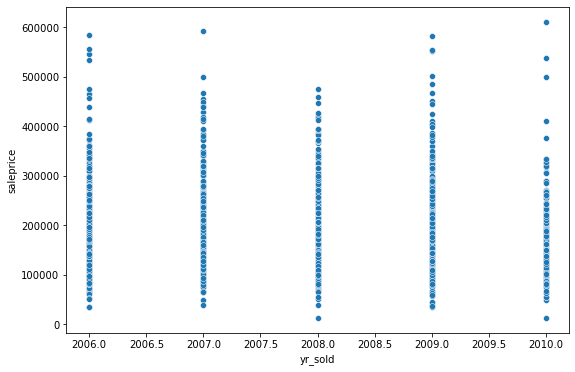

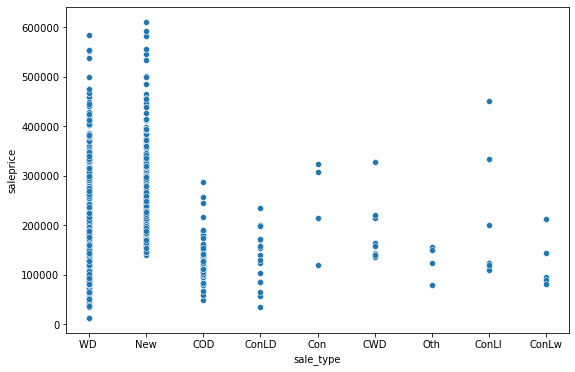

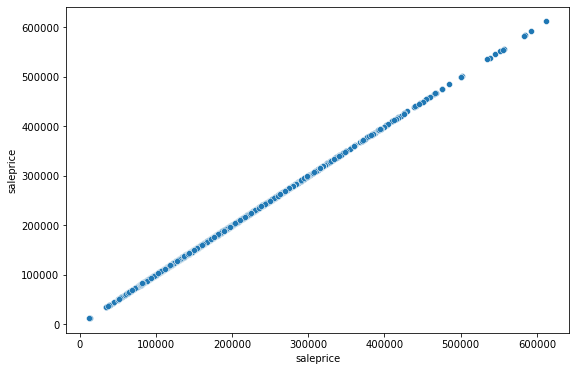

In [70]:
for i in df:
    f, ax = plt.subplots(figsize=(9, 6))
    sns.scatterplot(x = i, y = 'saleprice', data=df);

From the above, note that we have some outliers in the features. (Refer to slides for outliers). We will leave these datasets untouched and revise our model if necessary

In [71]:
#we still have too many columns. 
#lets simplify our features (also reduces multicollinearity)
df['total_porch_area'] = df['enclosed_porch'] + df['open_porch_sf']

In [72]:
#combining non-living area (basement & porch sq ft area)
df['gr_nliv_area'] = df['total_bsmt_sf'] + df['total_porch_area']

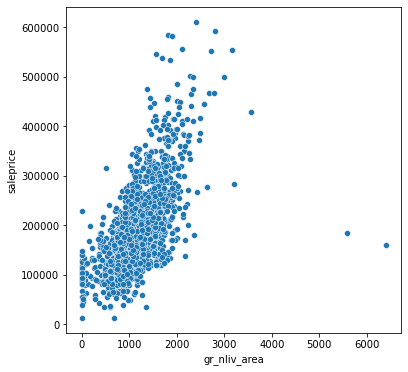

In [73]:
plt.figure(figsize = (6,6))
sns.scatterplot(x = 'gr_nliv_area', y = 'saleprice', data = df);

note that we have observed some outliers with high non-living area and relatively mean saleprice. We shall retain these outliers for now and see how the model performs

In [74]:
#lets combine year_built and year_remod/add as a new feature ("age")
df['age'] = np.where(
    df['year_built'] == df['year_remod/add'], df['year_built'], np.where(
    df['year_built'] >  df['year_remod/add'], df['year_built'], df['year_remod/add']))

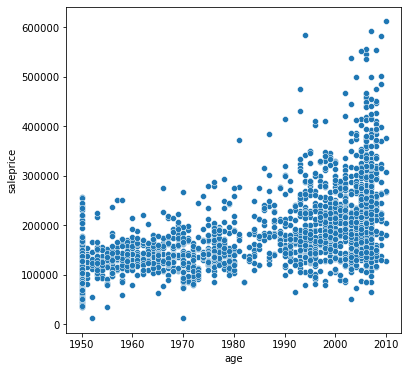

In [75]:
plt.figure(figsize = (6,6))
sns.scatterplot(x = 'age', y = 'saleprice', data = df);

In [76]:
#combining full baths as bathrooms
df['bathrooms'] = df['bsmt_full_bath'] + df['full_bath']

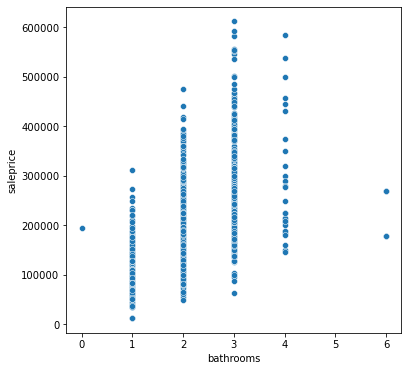

In [77]:
plt.figure(figsize = (6,6))
sns.scatterplot(x = 'bathrooms', y = 'saleprice', data = df);

In [78]:
#lets convert the remaining ordinal data to numerical data - Per data documentation (23 features/columns)
#we will be ranking them by lower number  = worst (no feature) , to highest number = best (or quality)
df['lot_shape'] = df['lot_shape'].map({'IR3':0, 'IR2':1, 'IR1':3, 'Reg':3})
#Overall Qual - already rated on a scale of 1 - 10
#Overall Cond - already rated on a scale of 1 - 10
df['exter_qual'] = df['exter_qual'].map({'Po':0, 'Fa':1, 'TA':2, 'Gd':3, 'Ex':4})
df['exter_cond'] = df['exter_cond'].map({'Po':0, 'Fa':1, 'TA':2, 'Gd':3, 'Ex':4})
df['heating_qc'] = df['heating_qc'].map({'Po':0, 'Fa':1, 'TA':2, 'Gd':3, 'Ex':4})
df['kitchen_qual'] = df['kitchen_qual'].map({'Po':0, 'Fa':1, 'TA':2, 'Gd':3, 'Ex':4})

In [79]:
#dropping the access columns which we used above
df.drop(['enclosed_porch','open_porch_sf', 'total_bsmt_sf','total_porch_area','bsmt_full_bath' , 'full_bath',
        'year_built','year_remod/add'], axis=1, inplace= True)

In [80]:
df.shape

(2048, 51)

In [81]:
#lets drop low correlation columns (<0.4 threshold)
def low_cor_cols(df):

    low_cor_cols = []

    temp_df = df.corr()['saleprice'].abs()
    for col, corr in temp_df.iteritems():
        if corr < 0.4:
            low_cor_cols.append(col)
    print(f"Low correlation columns: ", low_cor_cols)
    return low_cor_cols

In [82]:
df_low = low_cor_cols(df)

Low correlation columns:  ['lot_frontage', 'lot_area', 'lot_shape', 'overall_cond', 'exter_cond', 'bsmtfin_type_1', 'bsmtfin_type_2', 'bsmtfin_sf_2', 'bsmt_unf_sf', '2nd_flr_sf', 'half_bath', 'bedroom_abvgr', 'wood_deck_sf', 'mo_sold', 'yr_sold']


In [83]:
df.drop(low_cor_cols(df), axis = 1, inplace= True)

Low correlation columns:  ['lot_frontage', 'lot_area', 'lot_shape', 'overall_cond', 'exter_cond', 'bsmtfin_type_1', 'bsmtfin_type_2', 'bsmtfin_sf_2', 'bsmt_unf_sf', '2nd_flr_sf', 'half_bath', 'bedroom_abvgr', 'wood_deck_sf', 'mo_sold', 'yr_sold']


In [84]:
df.shape

(2048, 36)

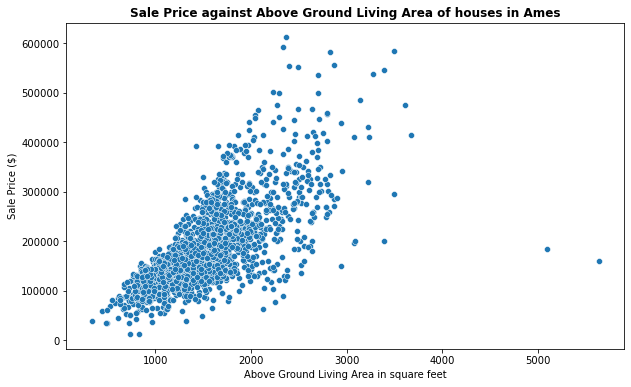

In [85]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='gr_liv_area', y='saleprice')

plt.xlabel('Above Ground Living Area in square feet')
plt.ylabel('Sale Price ($)')
plt.title('Sale Price against Above Ground Living Area of houses in Ames', weight='bold');

likewise, with our nonliving area feature we created, we note 2 outliers. We'll consider removing it later when we evaluate model performance

In [86]:
df.shape

(2048, 36)

In [87]:
df.dtypes

ms_subclass       object
ms_zoning         object
land_contour      object
lot_config        object
neighborhood      object
condition_1       object
bldg_type         object
house_style       object
overall_qual       int64
roof_style        object
exterior_1st      object
exterior_2nd      object
mas_vnr_type      object
mas_vnr_area     float64
exter_qual         int64
foundation        object
bsmt_qual          int64
bsmt_exposure      int64
bsmtfin_sf_1     float64
heating_qc         int64
1st_flr_sf         int64
gr_liv_area        int64
kitchen_qual       int64
totrms_abvgrd      int64
fireplaces         int64
fireplace_qu       int64
garage_type       object
garage_yr_blt    float64
garage_finish      int64
garage_cars      float64
garage_area      float64
sale_type         object
saleprice          int64
gr_nliv_area     float64
age                int64
bathrooms        float64
dtype: object

In [88]:
#get dummies for the remaining categorical columns
df = pd.get_dummies(data=df,drop_first=True)

In [89]:
df.shape

(2048, 150)

# Modelling

In [90]:
#define X & y
X = df.drop('saleprice', axis = 1)
y = df['saleprice']

#train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=26)

In [91]:
#built a function to run model

def run_model(model,modelname, X_train, X_test, y_train, y_test):

    #Fit model
    model.fit(X_train,y_train)
    
    #Predict
    y_preds_train = model.predict(X_train)
    y_preds_test = model.predict(X_test)
    
    #metrics
    r2_train = r2_score(y_train, y_preds_train)
    r2_test = r2_score(y_test, y_preds_test)
    
    rmse_train = np.sqrt(mean_squared_error(y_train, y_preds_train))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_preds_test))
    perc_diff_rmse = (rmse_train - rmse_test)/rmse_train * 100
    
    #CV score
    cv_score = cross_val_score(model, X_train, y_train, cv=5).mean()
    
    print(modelname, f"train RMSE: ", rmse_train)
    print(modelname, f"test RMSE: ", rmse_test)
    print(modelname, f'perc_diff_rmse: ', str(perc_diff_rmse)+"%")
    print(modelname, f"train R2 score: ", r2_train)
    print(modelname, f"test R2 score: ", r2_test)
    print(modelname, f"cross validation score: ", cv_score)

## Linear Regression Model

In [92]:
#baseline model
lr = LinearRegression()
run_model(lr,'Linear Regression Model', X_train, X_test, y_train, y_test)

Linear Regression Model train RMSE:  26766.898187249593
Linear Regression Model test RMSE:  26834.62449060991
Linear Regression Model perc_diff_rmse:  -0.253022606080585%
Linear Regression Model train R2 score:  0.8857606039325411
Linear Regression Model test R2 score:  0.8855903031078421
Linear Regression Model cross validation score:  0.8416285457936435


In [93]:
#scaling of data
ss = MinMaxScaler()
ss.fit(X_train)
Z_train = ss.transform(X_train)
Z_test = ss.transform(X_test)

## Ridge Model

In [94]:
#Ridge model

ridge = Ridge(alpha=1.0)
run_model(ridge,'Ridge Model', Z_train, Z_test, y_train, y_test)

Ridge Model train RMSE:  27040.776989945
Ridge Model test RMSE:  27079.754643671953
Ridge Model perc_diff_rmse:  -0.14414398573475629%
Ridge Model train R2 score:  0.8834108496306877
Ridge Model test R2 score:  0.8834905262981202
Ridge Model cross validation score:  0.8507770797889822


## RidgeCV Model

In [95]:
#RidgeCV model
ridgecv = RidgeCV(alphas=np.logspace(0,5,100), scoring='r2', cv=5)
run_model(ridgecv,'RidgeCV Model', Z_train, Z_test, y_train, y_test)

RidgeCV Model train RMSE:  27693.893651233804
RidgeCV Model test RMSE:  27602.831441445804
RidgeCV Model perc_diff_rmse:  0.32881692597943346%
RidgeCV Model train R2 score:  0.8777108729810623
RidgeCV Model test R2 score:  0.8789460243707734
RidgeCV Model cross validation score:  0.8535790083570888


## Lasso model

In [96]:
#Lasso model

lasso = Lasso(max_iter=50000)
run_model(lasso,'Lasso Model', Z_train, Z_test, y_train, y_test)

Lasso Model train RMSE:  26774.743489270222
Lasso Model test RMSE:  26779.01009392135
Lasso Model perc_diff_rmse:  -0.0159351840395381%
Lasso Model train R2 score:  0.8856936276320664
Lasso Model test R2 score:  0.8860640367972752
Lasso Model cross validation score:  0.8431828358666777


## LassoCV model

In [97]:
# Set up a list of Lasso alphas to check.
l_alphas = np.logspace(-3, 0, 100)

# Cross-validate over our list of Lasso alphas.
lasso_cv = LassoCV(alphas=l_alphas, cv=5, max_iter=50000)

# Fit model using best ridge alpha!
lasso_cv.fit(Z_train, y_train);
run_model(lasso_cv,'LassoCV Model', Z_train, Z_test, y_train, y_test)

LassoCV Model train RMSE:  26774.743489270222
LassoCV Model test RMSE:  26779.01009392135
LassoCV Model perc_diff_rmse:  -0.0159351840395381%
LassoCV Model train R2 score:  0.8856936276320664
LassoCV Model test R2 score:  0.8860640367972752
LassoCV Model cross validation score:  0.8431828358666777


# Testing Line Assumptions

/Users/soz/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


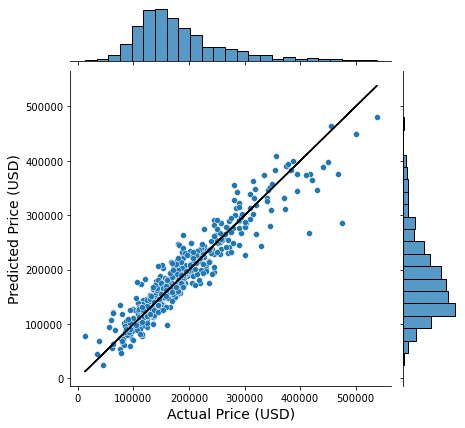

In [98]:
y_pred = lasso_cv.predict(Z_test)
g = sns.jointplot(y_test, y_pred, kind='scatter',height = 6 );
g.ax_joint.plot(y_test, y_test, color = 'black');
g.set_axis_labels('Actual Price (USD)','Predicted Price (USD)', fontsize = 14);

In [99]:
vif_data = pd.DataFrame()
vif_data["feature"] = X_train.columns
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X_train.values, i)
                          for i in range(len(X_train.columns))]
vif_data.sort_values(by = 'VIF',axis = 0, ascending=False, inplace=True)
vif_data

/Users/soz/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:1717: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss
/Users/soz/opt/anaconda3/lib/python3.9/site-packages/statsmodels/stats/outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,feature,VIF
84,bldg_type_Duplex,inf
117,exterior_2nd_CmentBd,inf
34,ms_subclass_90,inf
103,exterior_1st_CemntBd,inf
18,age,1.705624e+04
13,garage_yr_blt,1.697687e+04
39,ms_zoning_RL,1.628042e+03
40,ms_zoning_RM,3.136324e+02
24,ms_subclass_20,2.179956e+02
94,roof_style_Gable,1.976844e+02


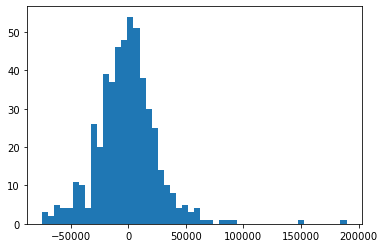

In [100]:
# N - Normality of errors
y_pred = lasso_cv.predict(Z_test)
resids = y_test - y_pred
plt.hist(resids, bins=50);

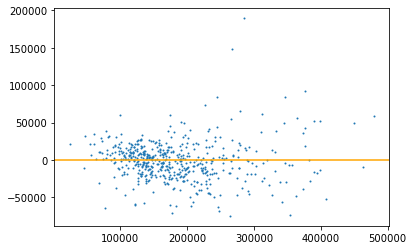

In [101]:
# E: 
plt.scatter(y_pred, resids, s=1)
plt.axhline(0, color="orange");

#looking at the scatterplot of the residuals,the residuals are randomly scattered around the center line of zero, with no obvious pattern.
# although we note that there are some points in the residuals that are likely due to the outliers which were not removed earlier. (reason for retaining explained above)

# Model Evaluation

From the results above, we see that our lasso model performed the best amognst the others. The lasso model has a lower RMSE score as well as a lower % difference between the train and test samples. Indicative of good generalization where the model is able to adapt new and previously unseen data, drawn from the same distribution as the one used to create the model.

From our LINE assumptions test, we can see that there are some violations such as multicollinearity present with high VIF values. Homoscedasticity also shows randomness with some outliers.

Of the models tested, all the models have performed relatively well at generalization. Even the Linear Regression model showed little to no signs of overfitting thus regularization wouldn't have played a major role here. This is likely due to thanks to the EDA & Feature Engineering performed. Lasso performs the best given the dataset. Regardless, We will propose using the lasso model based on the results presented. 

/Users/soz/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


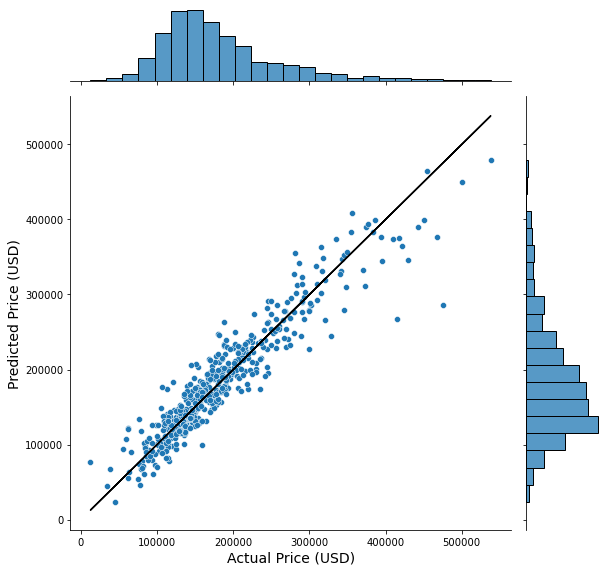

In [102]:
y_pred = lasso_cv.predict(Z_test)
g = sns.jointplot(y_test, y_pred, kind='scatter',height = 8 );
g.ax_joint.plot(y_test, y_test, color = 'black');
g.set_axis_labels('Actual Price (USD)','Predicted Price (USD)', fontsize = 14);

From the figure above, we can see that our model predicts well for actual sale prices up to around USD300,000. For the prices of properties above USD 300,000 our model appears to "under-value" these properties. Suggestion on handling properties in excess of USD 300,000 will be covered in our conclusion & recommendations below


#### Interpreting coefficients

In [103]:
rank = pd.DataFrame(X.columns,columns=['feature'])

In [104]:
rank['coef'] = lasso_cv.coef_

In [105]:
rank.sort_values(by='coef',ascending=False).head(10)

,feature,coef
8,gr_liv_area,200469.734160
57,neighborhood_GrnHill,134346.147355
0,overall_qual,88218.939426
5,bsmtfin_sf_1,63814.220902
72,neighborhood_StoneBr,56785.365580
38,ms_zoning_RH,56686.095813
37,ms_zoning_I (all),56141.052859
15,garage_cars,54529.012797
36,ms_zoning_FV,49400.295439
142,sale_type_Con,47031.731083


From the above, we note that the top 10 features are relatively representative of the housing prices around the world. Features such as ms_zoning, gr_liv_area, overall_qual & neighbourhood are representative of real world features when valuating a property such as "in context of Singapore"
* Type of building - HDB ,Condo, Landed (ms_zoning)
* How big is the unit - Dollar per sq ft. (gr_liv_area)
* Condition of home - This is a given. A home well used vs a brand new home (overall_qual)
* Neighbourhood - Orchard road vs Woodlands / Yishun (example) 


# Conclusion & Recommendations

From our initial dataset, there were around 80 columns/features. Real-life production models utalize around 30 - 50 features. Having considered the possiblity of an overfitted model and its inefficiencies, we looked to trim the dataset.

To address our problem statement, feature engineering and EDA has been performed to narrow the features down to around 35 columns. 

Ideally, the features of the model may be trimmed further. From our multicollinearity test, there are still many features which share collinearity amongst each other. Further work may be considered to categorize the features according to unique features such as Size, Profile, Time factors, Features, Finishing and Quality. These features would be sufficient to efficiently predict the house prices for the purpose of our problem statement. (Our presentation slides/model uses 17 features)

As for higher valued homes which the model may not perform as well in, it would be advisable that an on-site valuation be handled by human intervention as the model does not perform too well when prices exceed roughly USD 300,000 and up. Though, it is worth noting that the majority of the prices of properties fall under the ~ USD 300,000 price mark. (Given that the data is representative of all properties Ames). Alternatively, gathering of data for the higher valued homes will also help in assisting the model to better predict home prices in excess of USD 300,000.

Regardless, this regression model helped achieve effective prediction of  the valuation of properties. In turn, improving the end-to-end customer experience. By utalizing the model, we are able to achieve scalable savings through quicker turnaround times, higher take-up rates and reduction in labour hours. These are just some of the many benefits.

## Kaggle workings

In [106]:
df_test.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,2fmCon,2Story,6,8,1910,1950,Gable,CompShg,AsbShng,AsbShng,None,0.0,TA,Fa,Stone,Fa,TA,No,Unf,0,Unf,0,1020,1020,GasA,Gd,N,FuseP,908,1020,0,1928,0,0,2,0,4,2,Fa,9,Typ,0,NaN,Detchd,1910.0,Unf,1,440,Po,Po,Y,0,60,112,0,0,0,NaN,NaN,NaN,0,4,2006,WD
1,2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,Duplex,1Story,5,4,1977,1977,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,Gd,TA,No,Unf,0,Unf,0,1967,1967,GasA,TA,Y,SBrkr,1967,0,0,1967,0,0,2,0,6,2,TA,10,Typ,0,NaN,Attchd,1977.0,Fin,2,580,TA,TA,Y,170,0,0,0,0,0,NaN,NaN,NaN,0,8,2006,WD
2,2414,528218130,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,7,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,Gd,Av,GLQ,554,Unf,0,100,654,GasA,Ex,Y,SBrkr,664,832,0,1496,1,0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,2006.0,RFn,2,426,TA,TA,Y,100,24,0,0,0,0,NaN,NaN,NaN,0,9,2006,New
3,1989,902207150,30,RM,60.0,8520,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,1Story,5,6,1923,2006,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,Gd,TA,CBlock,TA,TA,No,Unf,0,Unf,0,968,968,GasA,TA,Y,SBrkr,968,0,0,968,0,0,1,0,2,1,TA,5,Typ,0,NaN,Detchd,1935.0,Unf,2,480,Fa,TA,N,0,0,184,0,0,0,NaN,NaN,NaN,0,7,2007,WD
4,625,535105100,20,RL,NaN,9500,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1963,1963,Gable,CompShg,Plywood,Plywood,BrkFace,247.0,TA,TA,CBlock,Gd,TA,No,BLQ,609,Unf,0,785,1394,GasA,Gd,Y,SBrkr,1394,0,0,1394,1,0,1,1,3,1,TA,6,Typ,2,Gd,Attchd,1963.0,RFn,2,514,TA,TA,Y,0,76,0,0,185,0,NaN,NaN,NaN,0,7,2009,WD


In [107]:
df_test.columns = df_test.columns.str.replace(' ','_').str.lower()

In [108]:
df_test.drop(['id','pid'], axis=1, inplace= True)

In [109]:
df_test['bsmt_qual'].fillna('NA' , inplace = True)
df_test['bsmt_exposure'].fillna('NA', inplace = True)
df_test['bsmtfin_type_1'].fillna('NA', inplace = True)
df_test['bsmtfin_type_2'].fillna('NA', inplace = True)

In [110]:
df_test['bsmt_qual'] = df_test['bsmt_qual'].map({'NA':0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})
df_test['bsmt_exposure'] = df_test['bsmt_exposure'].map({'NA':0, 'No':1, 'Mn':2, 'Av':3, 'Gd':4})
df_test['bsmtfin_type_1'] = df_test['bsmtfin_type_1'].map({'NA':0, 'Unf':1, 'LwQ':2, 'Rec':3, 'BLQ':4, 'ALQ':5, 'GLQ':6})
df_test['bsmtfin_type_2'] = df_test['bsmtfin_type_2'].map({'NA':0, 'Unf':1, 'LwQ':2, 'Rec':3, 'BLQ':4, 'ALQ':5, 'GLQ':6})

In [111]:
#lets drop pool_qc, misc_features, alley and fence columns as these features have > 90% missing values.
df_test.drop(['pool_qc','misc_feature','alley','fence'], axis=1, inplace= True)

In [112]:
df_test.drop(columns=list_imbalance, axis = 1, inplace = True)

In [113]:
df_test.isnull().sum()[df_test.isnull().sum()>0].sort_values(ascending=False)

fireplace_qu     422
lot_frontage     160
garage_yr_blt     45
garage_finish     45
garage_type       44
mas_vnr_type       1
mas_vnr_area       1
dtype: int64

In [114]:
#note that all garage_yr_blt missing values are those without garage's. Lets fill them up with min garage_yr_blt value
df_test['mas_vnr_type'].fillna(df_test['mas_vnr_type'].mode(), inplace=True)

In [115]:
df_test['mas_vnr_area'].fillna(df_test['mas_vnr_area'].mean(), inplace=True)

In [116]:
df_test['fireplace_qu'].fillna('NA' , inplace = True)

In [117]:
df_test['fireplace_qu'] = df_test['fireplace_qu'].map({'NA':0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})

In [118]:
df_test['garage_finish'].fillna('NA' , inplace=True)
df_test['garage_type'].fillna('NA', inplace=True)

In [119]:
#note that all garage_yr_blt missing values are those without garage's. Lets fill them up with min garage_yr_blt value
df_test['garage_yr_blt'].fillna(df_test['garage_yr_blt'].min(), inplace=True)

In [120]:
df_test['garage_finish'] = df_test['garage_finish'].map({'NA':0, 'Unf':1, 'RFn':2, 'Fin':3})

In [121]:
#convert ms_subclass to object
df_test['ms_subclass']= df_test['ms_subclass'].astype(str)

In [122]:
#lets simplify our features (also reduces multicollinearity)
df_test['total_porch_area'] = df_test['enclosed_porch'] + df_test['open_porch_sf']

In [123]:
#combining non-living area (basement & porch sq ft area)
df_test['gr_nliv_area'] = df_test['total_bsmt_sf'] + df_test['total_porch_area']

In [124]:
# lets combine year_built and year_remod/add
df_test['age'] = np.where(
    df_test['year_built'] == df_test['year_remod/add'], df_test['year_built'], np.where(
    df_test['year_built'] >  df_test['year_remod/add'], df_test['year_built'], df_test['year_remod/add']))

In [125]:
#combining full baths as bathrooms
df_test['bathrooms'] = df_test['bsmt_full_bath'] + df_test['full_bath']

In [126]:
#lets convert the remaining ordinal data to numerical data - Per data documentation (23 features/columns)
#we will be ranking them by lower number  = worst (no feature) , to highest number = best (or quality)
df_test['lot_shape'] = df_test['lot_shape'].map({'IR3':0, 'IR2':1, 'IR1':3, 'Reg':3})
#Overall Qual - already rated on a scale of 1 - 10
#Overall Cond - already rated on a scale of 1 - 10
df_test['exter_qual'] = df_test['exter_qual'].map({'Po':0, 'Fa':1, 'TA':2, 'Gd':3, 'Ex':4})
df_test['exter_cond'] = df_test['exter_cond'].map({'Po':0, 'Fa':1, 'TA':2, 'Gd':3, 'Ex':4})
df_test['heating_qc'] = df_test['heating_qc'].map({'Po':0, 'Fa':1, 'TA':2, 'Gd':3, 'Ex':4})
df_test['kitchen_qual'] = df_test['kitchen_qual'].map({'Po':0, 'Fa':1, 'TA':2, 'Gd':3, 'Ex':4})

In [127]:
#dropping the access columns which we used above
df_test.drop(['enclosed_porch','open_porch_sf', 'total_bsmt_sf','total_porch_area','bsmt_full_bath' , 'full_bath',
        'year_built','year_remod/add'], axis=1, inplace= True)

In [128]:
df_test.shape

(878, 50)

In [129]:
df_test.isnull().sum()[df_test.isnull().sum()>0].sort_values(ascending=False)

lot_frontage    160
mas_vnr_type      1
dtype: int64

In [130]:
df_test[df_test['mas_vnr_type'].isnull()]

,ms_subclass,ms_zoning,lot_frontage,lot_area,lot_shape,land_contour,lot_config,neighborhood,condition_1,bldg_type,house_style,overall_qual,overall_cond,roof_style,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,heating_qc,1st_flr_sf,2nd_flr_sf,gr_liv_area,half_bath,bedroom_abvgr,kitchen_qual,totrms_abvgrd,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,wood_deck_sf,mo_sold,yr_sold,sale_type,gr_nliv_area,age,bathrooms
865,60,RL,70.0,8749,3,Lvl,Inside,CollgCr,Norm,1Fam,2Story,7,5,Gable,VinylSd,VinylSd,NaN,106.236032,3,2,PConc,4,1,1,0,1,0,840,4,840,885,1725,1,3,3,6,0,0,Attchd,2002.0,2,2,550,0,11,2009,WD,888,2002,2


In [131]:
df_test['mas_vnr_type'] = df_test['mas_vnr_type'].replace(np.nan, 'None')

In [132]:
#lets replace null values in lot_frontage respective to their lot configs
df_test['lot_frontage'] = df_test.groupby('lot_config')['lot_frontage'].transform(lambda value: value.fillna(value.mean()))

In [133]:
df_test.shape

(878, 50)

In [134]:
df_test['mas_vnr_type'].value_counts()

None       535
BrkFace    250
Stone       80
BrkCmn      12
CBlock       1
Name: mas_vnr_type, dtype: int64

In [135]:
df_test.drop(df_low, axis = 1, inplace= True)

In [136]:
df_test = pd.get_dummies(data=df_test,drop_first=True)

In [137]:
df_test.shape

(878, 146)

In [138]:
df2 = df.drop('saleprice', axis = 1)

In [139]:
#to ensure the columns are the same as train set
df_test = df_test.reindex(columns = df2.columns, fill_value=0)

In [140]:
X = df_test

In [141]:
Z_train = ss.transform(X)

In [142]:
y_pred_lassocv = lasso_cv.predict(Z_train)

In [143]:
test = pd.read_csv('datasets/test.csv')
submission = test[["Id"]]

In [144]:
submission["SalePrice"] = y_pred_lassocv

/var/folders/r_/49pl15x93h7_fgw1j0x9phxc0000gn/T/ipykernel_87402/3700987256.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  submission["SalePrice"] = y_pred_lassocv


In [145]:
submission.to_csv('my_output_lassocv.csv', index=False)

In [146]:
submission.head()

,Id,SalePrice
0,2658,131278.580019
1,2718,158783.976578
2,2414,228963.039855
3,1989,119028.067160
4,625,181115.780612


# Kaggle score

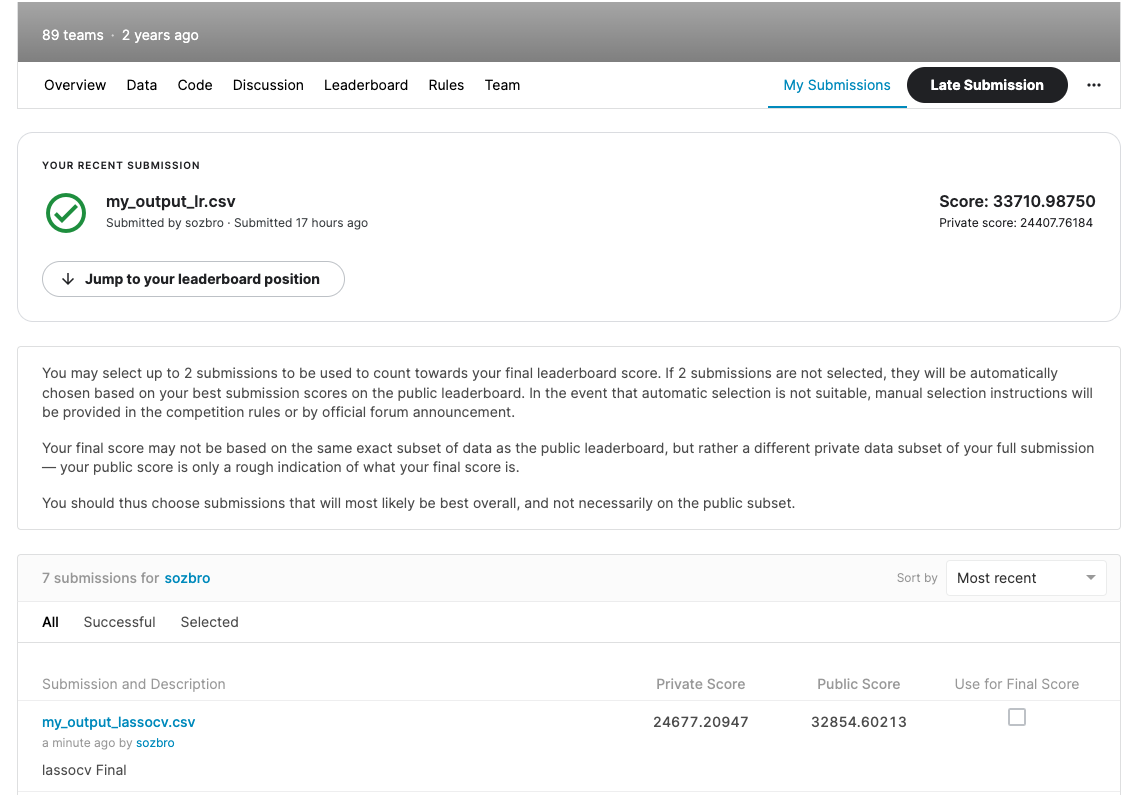

    public score: 32854
    private score: 24677